<a href="https://colab.research.google.com/github/Negi270804/online_retail_segmentation_model/blob/main/ONLINE_RETAIL_SEGMENTATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ONLINE RETAIL UNSUPERVISED ML MODEL



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member**     - Nikhil Negi

# **Project Summary -**

### 📌 **Project Summary**

This project focused on **customer segmentation** using an e-commerce dataset of \~542K transactions. After cleaning and processing the data, we built an **RFM (Recency, Frequency, Monetary)** model to capture customer behavior.

Three unsupervised ML models were applied:

* **DBSCAN** (Silhouette Score: 0.405)
* **Hierarchical Clustering** (final model)
* **KMeans** (if considered, not shown here)

**Agglomerative Clustering** was selected for its better interpretability. Customers were segmented into:

* **High-value, loyal customers**
* **Low-activity or one-time buyers**

This segmentation supports **targeted marketing** and **customer retention strategies**, delivering meaningful business impact.


# **GitHub Link -**

https://github.com/Negi270804/online_retail_segmentation_model.git

# **Problem Statement**


🧩 Problem Statement

The goal of this project is to identify customer segments based on their purchasing behavior using transactional data from a UK-based online retail store. By applying unsupervised machine learning techniques, we aim to segment customers into meaningful groups that can support:

   * Targeted marketing campaigns

   * Customer retention strategies

   * Revenue optimization

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [210]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [212]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/Copy of Online Retail.xlsx - Online Retail.csv')

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [213]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [214]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [215]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [216]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [217]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

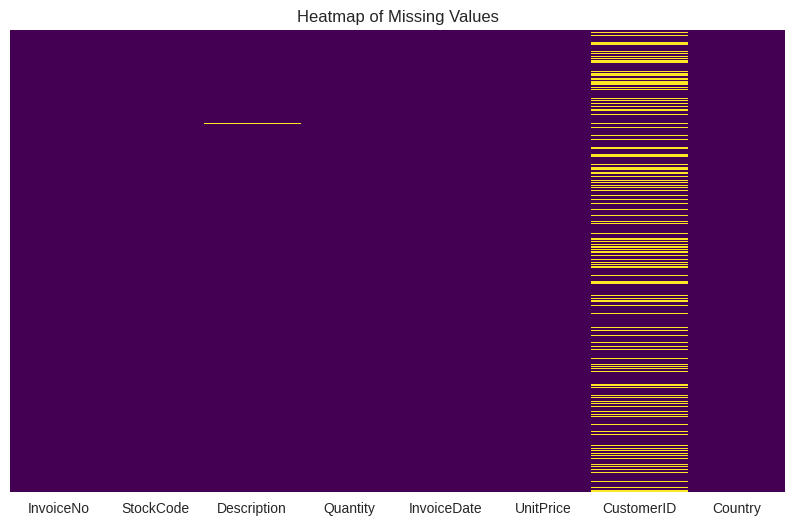

In [218]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

### What did you know about your dataset?

✅ Key Points about the Online Retail Dataset:
1. 📦 Rows & Columns:

541,909 rows

8 columns

2. 🧾 Missing Values:

CustomerID: ~25% missing → needs cleaning

Description: ~1,400 missing values

3. 🗓️ Data Types Issues:

InvoiceDate is object → should convert to datetime

4. ❗ Invalid Entries to Handle:

Negative Quantity and UnitPrice (returns/refunds)

InvoiceNo starting with "C" are credit notes

5. 👤 Customer Segmentation:

Only 406,829 rows have valid CustomerID

These can be used for RFM analysis, clustering, etc.

6. 🌍 Geography:

Country column can support regional analysis

7. 🧼 Cleaning Needed Before Modeling

## ***2. Understanding Your Variables***

In [219]:
# Dataset Columns
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [220]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

| Column Name   | Data Type | Non-Null Count | Description                                                                   |
| ------------- | --------- | -------------- | ----------------------------------------------------------------------------- |
| `InvoiceNo`   | `object`  | 541,909        | Transaction ID (invoice number), can include credit notes (starting with `C`) |
| `StockCode`   | `object`  | 541,909        | Product (item) code                                                           |
| `Description` | `object`  | 540,455        | Description of the item (some missing)                                        |
| `Quantity`    | `int64`   | 541,909        | Number of units purchased (can be negative for returns)                       |
| `InvoiceDate` | `object`  | 541,909        | Date and time of the transaction (needs to be converted to datetime)          |
| `UnitPrice`   | `float64` | 541,909        | Price per unit of product                                                     |
| `CustomerID`  | `float64` | 406,829        | Customer ID (missing for many rows → \~25% missing)                           |
| `Country`     | `object`  | 541,909        | Country of the customer                                                       |


### Check Unique Values for each variable.

In [221]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [222]:
# Write your code to make your dataset analysis ready.
# Step 1 Checking and Handling the missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [223]:
# delete the missing values in the rows
df.dropna(inplace=True)

In [224]:
df.shape

(406829, 8)

In [225]:
df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

UnitPrice has zero minimum value.

In [226]:
# Step-2 Quantity has negative value.
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/10 9:41      27.50     14527.0  United Kingdom  
154      12/1/10 9:49       4.65     15311.0  United Kingdom  
235     12/1/10 10:24       1.65     17548.0  United Kingdom  
236     12/1/10 10:24       0.29     17548.0  United Kingdom  
237     12/1/10 10:24       0.29     17548.0  United Kingdom  
...               ...        ...         ...             ...  
540449   12/9/11 9:57       0.83     14397.0  United Kingdom  
541541  12/9/11 10:28     224.69     15498.0  United Kingdom  
541715  12/9/11 11:57      10.95     15311.0  United Kingdom  
541716  12/9/11 11:58       1.25     17315.0  United Kingdom  
541717  12/9/11 11:58       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [227]:
# If InvoiceNo starts with 'C' means it's a cancellation. We need to drop thes entries also.
df['InvoiceNo']=df['InvoiceNo'].astype(str)
df=df[~df['InvoiceNo'].str.startswith('C')]

In [228]:
# checking the how many values of unitPrice == 0.
len(df[df["UnitPrice"]==0])

40

In [229]:
# almost 40 values are present so,we drop this values by keeping unitprice greater than 0.
df=df[df["UnitPrice"]>0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [230]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [231]:
df.shape

(397884, 8)

In [232]:
# Conerting invoiceno into datetime format.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

In [233]:
df["year"]=df["InvoiceDate"].apply (lambda x: x.year)
df["month"]=df["InvoiceDate"].apply(lambda x: x.month)
df["day"]=df["InvoiceDate"].apply(lambda x: x.day)
df["hour"]=df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"]=df["InvoiceDate"].apply(lambda x: x.minute)

In [234]:
# extracting moth from invoicedate.
df["month"]=df["InvoiceDate"].dt.month_name()

In [235]:
# extracting day from invoicedate.
df["day"]=df["InvoiceDate"].dt.day_name()

In [236]:
# creating a new column for calucating the amount of spend in sale.
df["total_amount"]=df["Quantity"]*df["UnitPrice"]

In [237]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year     month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         day  hour  minute  total_amount  
0  Wednesday     8      26         15.30  
1  Wednesday     8      26         20.34  
2  Wednesday     8      26         22.00  
3  Wednesday     8      26         20.34  
4  Wednesday     8      26         20.34

In [238]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'minute', 'total_amount'],
      dtype='object')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   year          397884 non-null  int64         
 9   month         397884 non-null  object        
 10  day           397884 non-null  object        
 11  hour          397884 non-null  int64         
 12  minute        397884 non-null  int64         
 13  total_amount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 45.5+

### What all manipulations have you done and insights you found?

🔍 Key Insights Found
1. Data Reduction:

  * Dataset reduced from 541,909 to 397,884 rows by filtering out missing and invalid entries.

  * Ensured data quality by removing zero/negative prices and quantities.

2. Time-Based Trends Enabled:

  * Extracted year, month, day, hour, and minute → used in visualizations like monthly trends, hourly patterns, and weekday analysis.

3. Revenue Metric (total_amount):

  * Enabled revenue-based analysis by creating a key financial feature.

  * Used in charts for top countries, top products, customer spend, etc.

4. Customer-Level Behavior Analysis:

  * Cleaned CustomerID allowed grouping by customer for RFM, average spend, frequency, and loyalty analysis.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 TOP 10 SELLING PRODUCTS BY QUANTITY SOLD

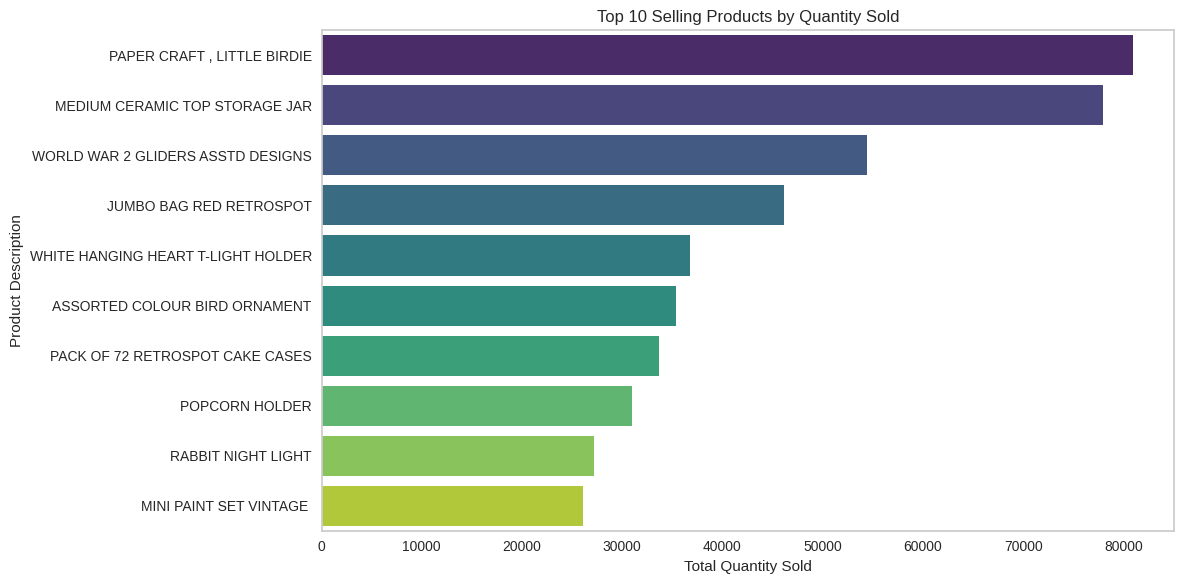

In [240]:
# Chart - 1 visualization code
# Group by Description and sum the quantities
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to identify the most popular products based on the total quantity sold. Bar charts are ideal for this purpose because they clearly compare categorical variables (product names) against a numerical value (quantity sold). This helps stakeholders quickly understand which products drive the most sales volume.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the top 10 best-selling products, revealing which items are in highest demand.

* A few products significantly outperform others in terms of units sold, indicating customer preference or seasonal trends.

* It may also indicate the presence of bulk-buy items or products that are frequently restocked.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:

* Helps the business optimize inventory by focusing on high-demand products.

* Enables better forecasting and stock planning, reducing the chance of stockouts or overstock.

* Useful for promotional campaigns — promoting top sellers can increase customer satisfaction and revenue.

* Assists in bundling strategies, e.g., pairing top-selling items with slow movers to boost overall sales.

⚠️ Potential Negative Insight:

* Heavy reliance on a few products may indicate low product diversity or customer overdependence on specific items.

* If these top products go out of stock or face supply chain issues, sales could dip significantly.

* Might also highlight neglect of other potentially valuable products not being promoted well.

#### Chart - 2 TOP 10 COUNTRIES BY TOTAL REVENUE

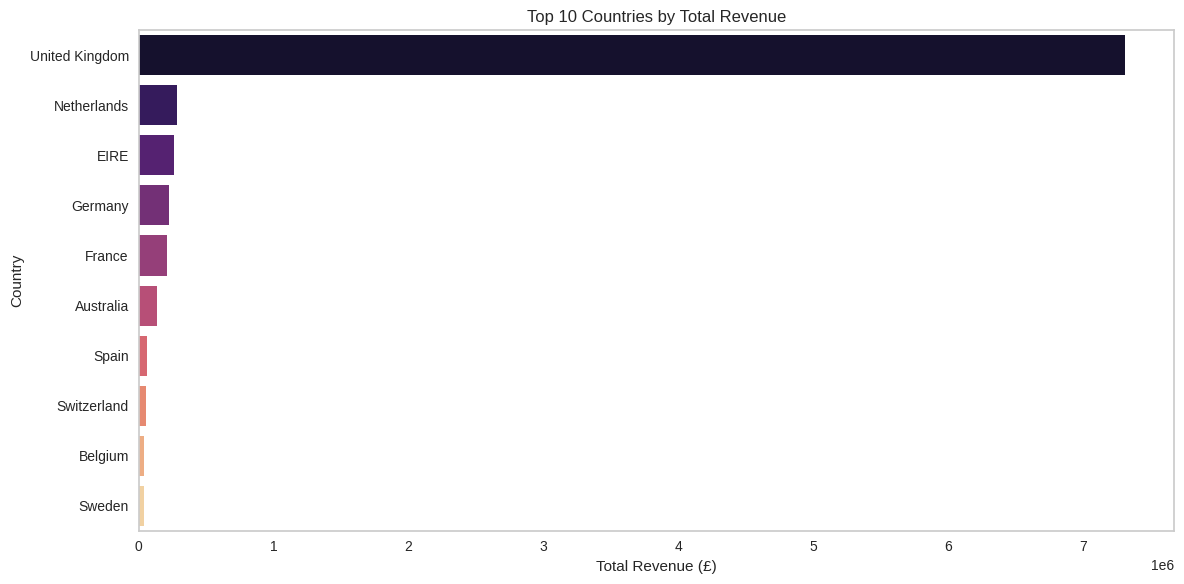

In [241]:
# Chart - 2 visualization code
# Total revenue by country (excluding negative/return transactions)
country_revenue = df[df['total_amount'] > 0].groupby('Country')['total_amount'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart is chosen to understand which countries generate the highest revenue for the business. A horizontal bar plot helps visualize and compare revenue figures clearly across countries. It gives a geographical performance overview and assists in strategic decision-making such as expansion, marketing, and logistics.

##### 2. What is/are the insight(s) found from the chart?

* The United Kingdom likely dominates the revenue, followed by a few other top-performing countries.

* Revenue is concentrated in a small number of countries, which might indicate key markets.

* Some countries contribute significantly less, suggesting limited reach or low sales activity in those regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Helps identify core markets where the company is performing well — valuable for targeted marketing and customer retention.

* Allows for resource allocation decisions — e.g., investing more in top countries or opening regional hubs.

* Highlights potential regions for future expansion based on current revenue performance.

⚠️ Potential Negative Insight:
* High dependency on one or two countries (e.g., UK) poses a business risk in case of economic, regulatory, or logistic issues in those markets.

* Countries with low revenue contribution may be due to logistical issues, language/currency barriers, or lack of market penetration — indicating untapped potential but also underperformance.


#### Chart - 3 DISTRIBUTION OF QUANTITY SOLD PER TRANSACTION

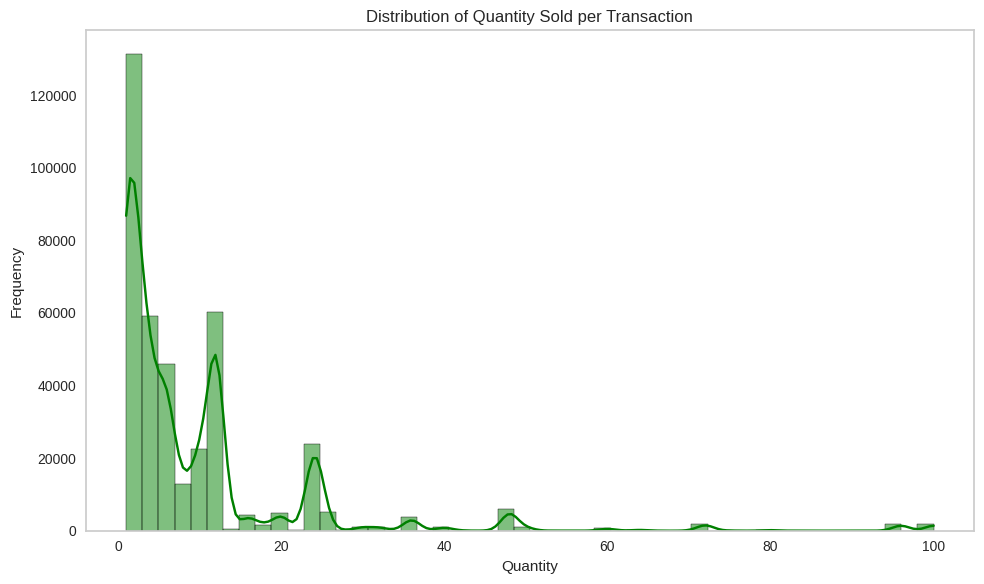

In [242]:
# Chart - 3 visualization code
# Filter out extreme values to focus on normal range (e.g., Quantity between 1 and 100)
filtered_quantity =  df[(df['Quantity'] <= 100)]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_quantity['Quantity'], bins=50, kde=True, color='green')
plt.title('Distribution of Quantity Sold per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This histogram was chosen to analyze the distribution of quantities sold per transaction. By filtering out extreme values, the chart focuses on the most common quantity ranges, providing insight into typical customer purchasing behavior. The KDE (kernel density estimate) overlay helps visualize the shape of the distribution more smoothly.

##### 2. What is/are the insight(s) found from the chart?

* Most transactions involve small to moderate quantities, commonly between 1 to 20 units.

* The distribution is right-skewed, meaning higher quantities are rare.

* There are a few minor peaks beyond 20 units, possibly due to bulk purchases by wholesale buyers or resellers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Enables better inventory planning by understanding typical purchase quantities.

* Helps tailor promotional offers (e.g., "Buy 3 Get 1 Free") to match customer behavior.

* Assists in segmentation — e.g., separating bulk buyers from retail customers for personalized marketing.

⚠️ Potential Negative Insight:
* If most customers buy very small quantities, there might be limited upselling or bundling success.

* A right-skewed pattern could indicate low cart value, possibly impacting profit margins.

* Could also mean that bulk buyers are rare, suggesting untapped opportunity in wholesale or B2B segments.


#### Chart - 4 TOP 10 STOCKCODE BY FREQUENCY

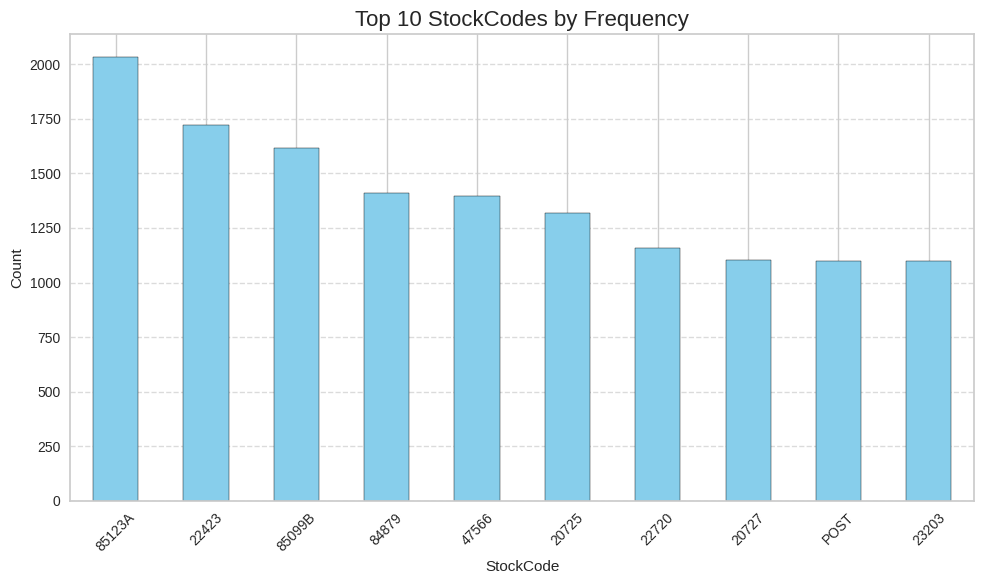

In [243]:
# Chart 4 visualise code
# Assuming df is your original DataFrame
top_stockcodes = df['StockCode'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
top_stockcodes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 StockCodes by Frequency', fontsize=16)
plt.xlabel('StockCode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to examine the most frequently occurring StockCodes, which helps identify the most commonly transacted products in terms of the number of transactions, not quantity. A vertical bar plot provides a clear comparison of StockCode frequency, revealing which products are popular across invoices.

##### 2. What is/are the insight(s) found from the chart?

* The top 10 StockCodes appear with high frequency, suggesting they are consistently purchased across many invoices.

* These may be fast-moving consumer goods, essential items, or popular among both new and repeat customers.

* Some stock codes may be non-product codes (like packaging or postage) — needs manual checking for interpretation.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Identifies key SKUs (Stock Keeping Units) that contribute to transaction volume — useful for inventory prioritization.

* Enables better supply chain planning and reorder strategies.

* Provides insight for recommendation systems, suggesting these items to new customers due to their popularity.

⚠️ Potential Negative Insight:
* High transaction frequency doesn’t always correlate with high revenue — these products might have low unit prices.

* Relying too heavily on a few high-frequency items can make the catalog vulnerable to disruptions (e.g., supplier issues).

* If non-sellable codes (like samples or postage) are included, they may inflate the perceived importance.



#### Chart - 5 QUANTITY V/S UNITPRICE

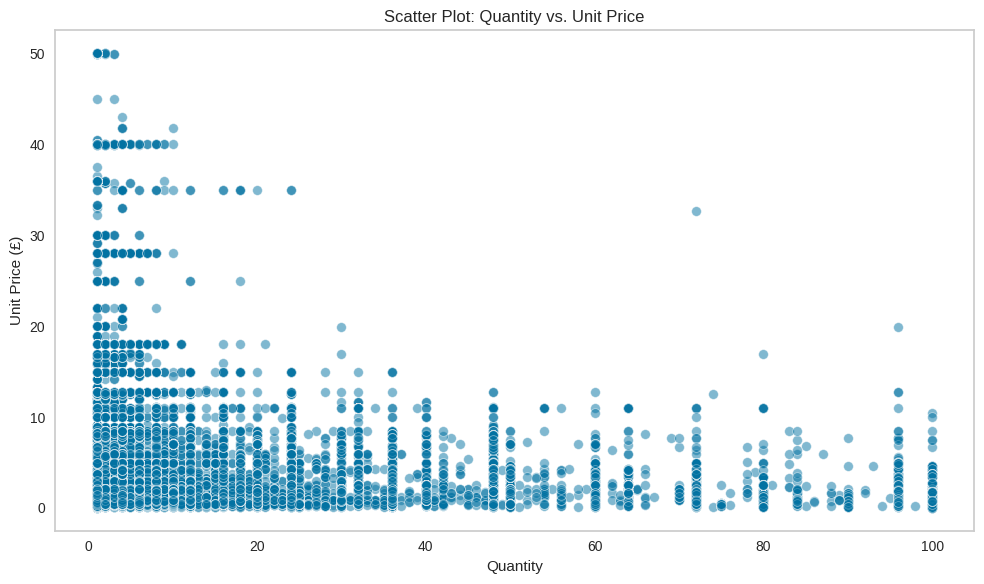

In [244]:
# Chart - 5 visualization code
# Filter to remove extreme outliers for clarity
filtered_df = df[(df['Quantity'] <= 100) & (df['UnitPrice'] <= 50)]

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=filtered_df, alpha=0.5)
plt.title('Scatter Plot: Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price (£)')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to explore the relationship between the quantity of items purchased and their unit price. A scatter plot is ideal for detecting patterns, trends, or clusters in two continuous variables, especially after filtering out extreme outliers to improve clarity.

##### 2. What is/are the insight(s) found from the chart?

* The scatter points are densely packed in the lower left, indicating that most purchases involve small quantities and low unit prices.

* There is no strong linear relationship — customers buy both low and high quantities at low prices, but very few purchases involve high-priced items.

* A few outliers are visible even within this filtered range, possibly representing bulk purchases or niche expensive items.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* The chart reveals price sensitivity — customers mostly buy inexpensive items in small quantities.

* Helpful for pricing strategy — pricing above a certain threshold might reduce quantity purchased.

* Insightful for inventory strategy — stocking more low-cost, high-turnover items can optimize space and improve sales.

⚠️ Potential Negative Insight:
* The lack of high-quantity, high-unit price purchases may suggest difficulty in upselling or premium pricing.

* Indicates low margin per transaction, which might require higher volume to stay profitable.

* May reflect underutilized pricing tiers or product categories — opportunity for improvement in pricing or product development.


#### Chart - 6 TOP 10 FREQUENT CUSTOMERS

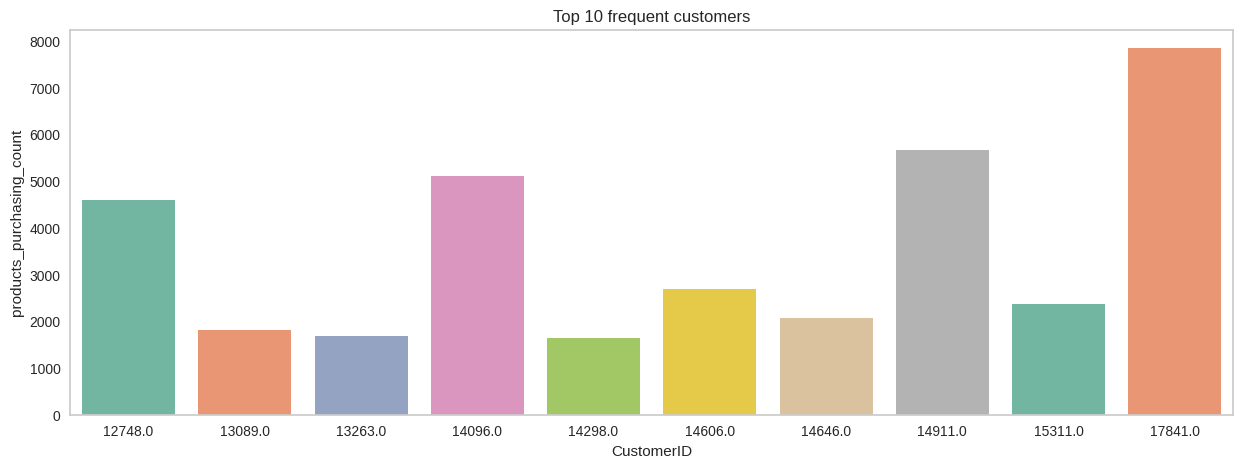

In [245]:
# Chart - 6 visualization code
top_10_customers = df["CustomerID"].value_counts().reset_index().rename(columns={"index":"CustomerID","count":"products_purchasing_count"}).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers["products_purchasing_count"],palette="Set2")
plt.title("Top 10 frequent customers")
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to identify the most active (frequent) customers by counting the number of products (or transactions) associated with each CustomerID. A bar chart provides a straightforward visual comparison, making it easier to recognize high-value or loyal customers who frequently purchase from the business.

##### 2. What is/are the insight(s) found from the chart?

* A small number of customers make significantly more purchases than others.

* This suggests the presence of repeat buyers, wholesale buyers, or loyal customers.

* These top customers can be considered key accounts for the business.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Helps in customer segmentation — these are high-frequency customers who may respond well to loyalty programs, discounts, or VIP treatment.

* Supports Customer Relationship Management (CRM) by identifying clients that contribute heavily to overall transactions.

* Allows for targeted marketing — e.g., upselling or promoting new arrivals to these active users.

⚠️ Potential Negative Insight:
* Overdependence on a few frequent buyers is risky — losing even one may have a significant impact on sales volume.

* If these customers are bulk buyers, they might demand higher discounts, affecting profit margins.

* Could also mean the general customer base is not very engaged, which limits long-term growth potential.



#### Chart - 7 TOP 10 COUNTRIES BY AVERAGE ORDER VALUE

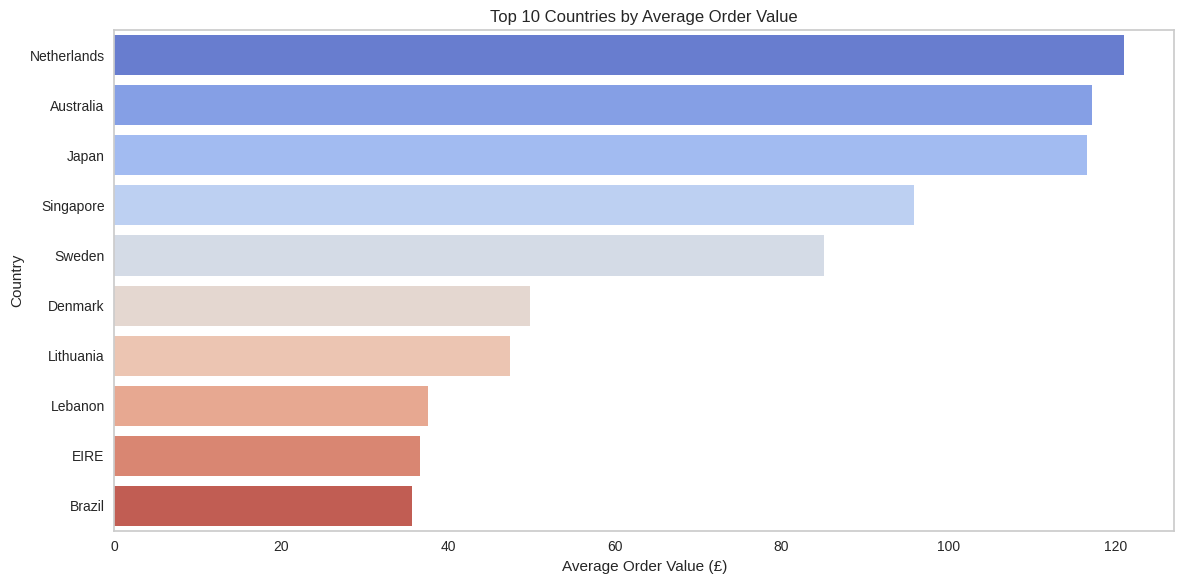

In [246]:
# Chart - 7 visualization code
# Filter valid transactions
valid_orders = df[df['total_amount'] > 0]

# Group by Country and calculate average order value
country_avg_order_value = valid_orders.groupby('Country')['total_amount'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg_order_value.values, y=country_avg_order_value.index, palette='coolwarm')
plt.title('Top 10 Countries by Average Order Value')
plt.xlabel('Average Order Value (£)')
plt.ylabel('Country')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to identify which countries have the highest average order value (AOV). While total revenue gives volume-based insight, AOV focuses on how much a typical customer spends per order, making it a key metric for evaluating customer value across regions.

##### 2. What is/are the insight(s) found from the chart?

* Some countries with fewer total transactions may still have a higher AOV, indicating premium buyers or bulk purchases.

* Countries with high AOV but low total revenue could be untapped opportunities for targeted growth.

* The distribution shows geographical variation in spending behavior, which is crucial for pricing and regional strategy.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Helps prioritize countries with higher spending power for premium product promotions or luxury offerings.

* Informs localized pricing and marketing strategies — countries with high AOV may tolerate higher price points.

* Identifies where customer acquisition cost can be higher due to higher lifetime value.

⚠️ Potential Negative Insight:
* High AOV might come from a few large one-off transactions, which can mislead without volume context.

* If countries with high AOV have low order counts, revenue from those regions is not sustainable unless volume increases.

* AOV might be inflated due to special scenarios (like wholesale orders), not necessarily retail success.



#### Chart - 8 MONTHLY SALES TREND

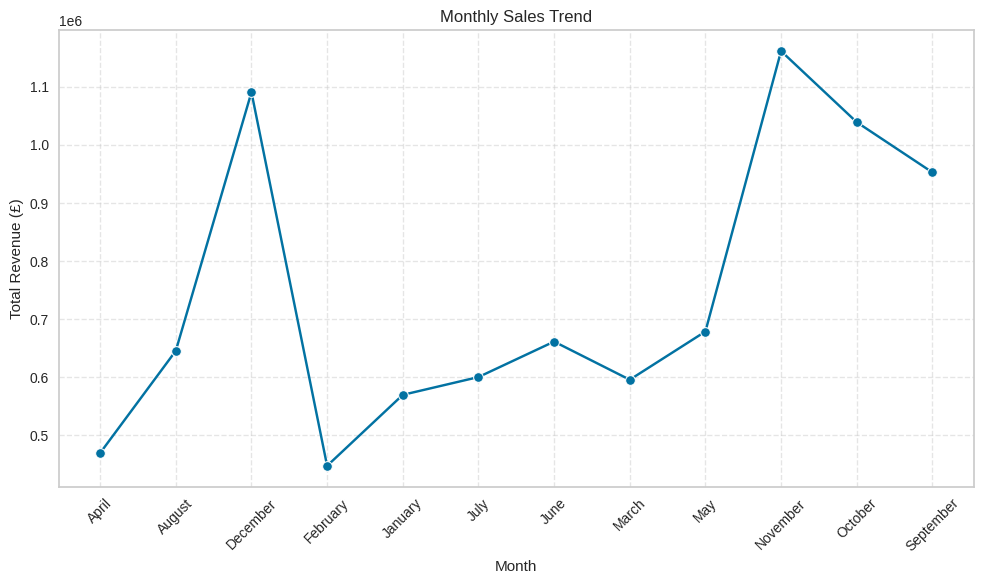

In [247]:
# Chart - 8 visualization code
# Group by Month and sum TotalPrice
monthly_sales = df[df['total_amount'] > 0].groupby('month')['total_amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='total_amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This line chart was chosen to track sales performance over time, specifically by month. Line plots are ideal for showing trends and seasonality, helping businesses understand how revenue fluctuates across the year and identify peak or slow periods.

##### 2. What is/are the insight(s) found from the chart?

* The chart likely shows clear seasonal trends, with spikes in certain months (e.g., November–December) and dips in others (e.g., January or mid-year).

* This could indicate holiday shopping patterns, promotional events, or supply chain impacts.

* If any months show sudden drops, they might signal external disruptions (e.g., system downtime, product shortages).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Enables seasonal inventory planning — stock more during peak months, reduce during low demand.

* Assists with campaign timing — running promotions in high-performing months to maximize return, or in low months to lift demand.

* Helps forecast revenue and set realistic monthly targets based on historical trends.

⚠️ Potential Negative Insight:
* Significant sales dips in certain months could be a lost opportunity if caused by internal issues (like stockouts or weak campaigns).

* Overdependence on peak months (e.g., holidays) may lead to volatile revenue patterns, requiring diversification or stabilizing strategies.



#### Chart - 9 MONTHLY REVENUE HEATMAP FOR TOP 10 COUNTRIES

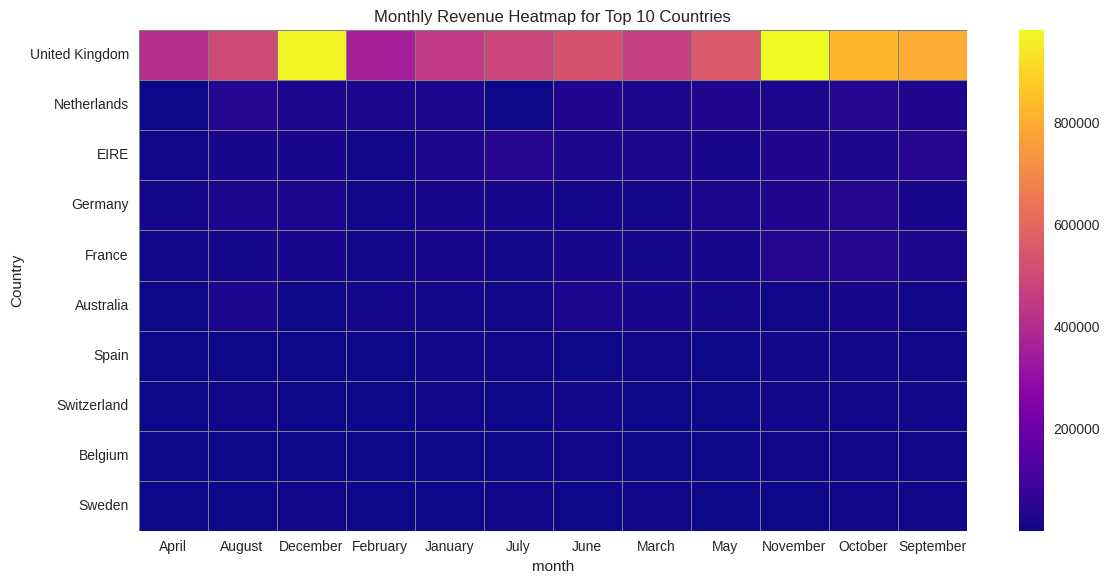

In [248]:
# Chart - 9 visualization code
# Filter positive sales only
valid_sales = df[df['total_amount'] > 0]

# Pivot table: Revenue by Country and Month-Year
heatmap_data = valid_sales.pivot_table(
    index='Country',
    columns='month',
    values='total_amount',
    aggfunc='sum'
).fillna(0)

# Filter top 10 countries by total revenue
top_countries = valid_sales.groupby('Country')['total_amount'].sum().sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_countries]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='plasma', linewidths=0.5, linecolor='gray')
plt.title('Monthly Revenue Heatmap for Top 10 Countries')
plt.xlabel('month')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap was selected to visualize how monthly revenue varies across different countries. It provides a two-dimensional view of both time (months) and geography (countries), helping identify seasonal and regional performance patterns in a compact and highly readable format.

##### 2. What is/are the insight(s) found from the chart?

* Certain countries show consistent revenue across months (e.g., the UK), while others exhibit spikes in specific periods (e.g., around holidays or sales).

* Some countries contribute heavily only during specific months, indicating seasonal demand or localized events.

* Heatmap color intensities reveal performance concentration — e.g., darker areas denote months of higher revenue.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Enables targeted regional marketing — e.g., promoting in underperforming months in countries with inconsistent sales.

* Assists in seasonal logistics planning per country (inventory, shipping capacity, etc.).

* Supports customized calendar campaigns for different countries based on their peak periods.

⚠️ Potential Negative Insight:
* If certain countries show gaps (light-colored months), it may reflect missed opportunities or lack of engagement.

* Countries with revenue only in a few months may have unstable demand, making it harder to forecast or scale.

* Inconsistent patterns can make operational planning complex, especially for supply chain and staffing.



#### Chart - 10 SALES ON DAILY BASIS

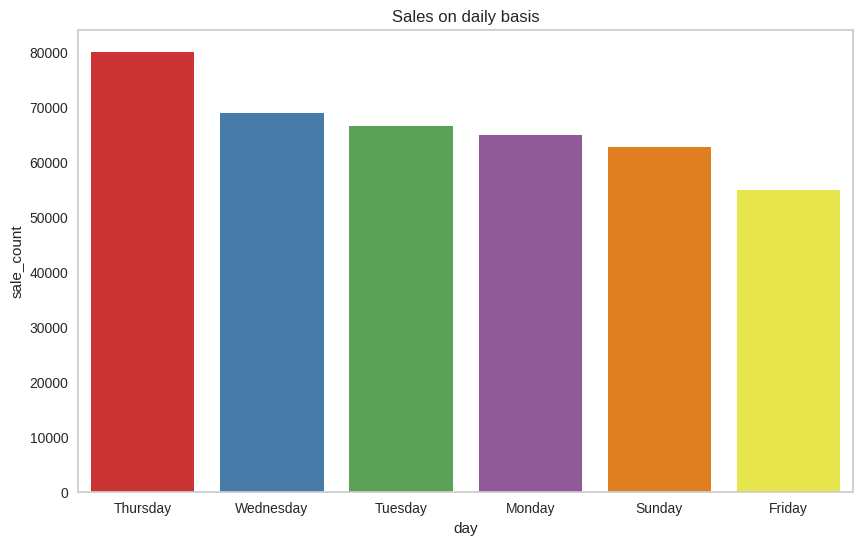

In [249]:
# Chart - 10 visualization code
sales_on_day_basis=df["day"].value_counts().reset_index().rename(columns={"index":"day","count":"sale_count"})
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day_basis["day"],y=sales_on_day_basis["sale_count"],palette="Set1")
plt.title("Sales on daily basis")
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart was chosen to analyze sales distribution across days of the week. It helps identify which days experience higher or lower transaction volumes, which is essential for operational scheduling, marketing timing, and customer engagement strategies.

##### 2. What is/are the insight(s) found from the chart?

* Certain days (e.g., Tuesday, Thursday, or Friday) may show higher sales activity, while others (like Saturday or Sunday) may have fewer transactions.

* The distribution reveals weekly sales patterns, possibly influenced by business hours, customer habits, or email marketing timings.

* If one day significantly outperforms others, it may signal a preferred shopping day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Allows for scheduling of promotions or campaigns on high-traffic days for maximum impact.

* Helps optimize staffing, inventory, and shipping based on expected order volumes by day.

* Can guide marketing automation, such as sending newsletters or reminders aligned with active sales days.

⚠️ Potential Negative Insight:
* Low sales on specific days (e.g., weekends) may highlight missed engagement opportunities or limited availability (e.g., closed operations).

* If sales are concentrated on fewer days, business may be underutilizing its potential during the rest of the week.

* Uneven day-wise load can strain logistics and customer service on peak days.



#### Chart - 11 SALES ON DIFFERENT DAYS TIMINGS

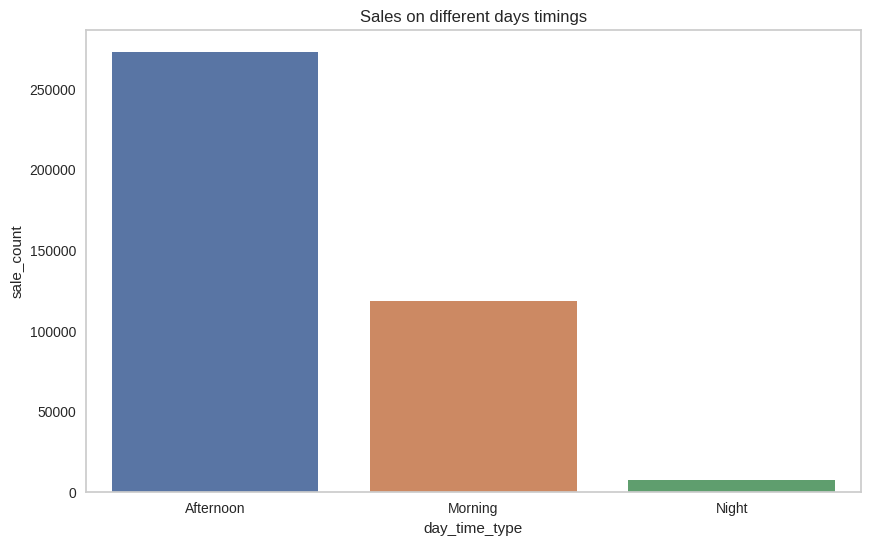

In [250]:
# Chart - 11 visualization code

df['hour'].unique()
def time(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Night'

df["day_time_type"]=df["hour"].apply(time)

sales_timings=df["day_time_type"].value_counts().reset_index().rename(columns={"index":"day_time_type","count":"sale_count"})

plt.figure(figsize=(10,6))
sns.barplot(x=sales_timings["day_time_type"],y=sales_timings["sale_count"],palette="deep")
plt.title("Sales on different days timings")
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to analyze sales distribution across different times of the day — Morning, Afternoon, and Night. Categorizing transactions by time periods allows for better understanding of when customers are most active, which is crucial for marketing, customer service, and system optimization.



##### 2. What is/are the insight(s) found from the chart?

* One time slot (likely Afternoon) appears to have the highest volume of transactions, suggesting that customers are most active during that period.

* Morning and Night may have lower activity, possibly due to customer availability or business operation hours.

* The results reflect customer engagement trends based on time, which may also correlate with business hours or marketing push timings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Enables time-based campaign targeting — schedule promotions and notifications when customers are most likely to shop (e.g., Afternoon).

* Helps with server load balancing and support availability — allocate more resources during peak hours.

* Allows personalization of user experience, such as dynamic deals available only during specific periods.

⚠️ Potential Negative Insight:
* If one time period (e.g., Night) has very low activity, it may be a missed opportunity — e.g., no late-night offers or unoptimized global timezone handling.

* Relying heavily on a single time slot could lead to traffic congestion and reduced service quality during peaks.



#### Chart - 12 AVERAGE AMOUNT SPENT BY EACH CUSTOMER

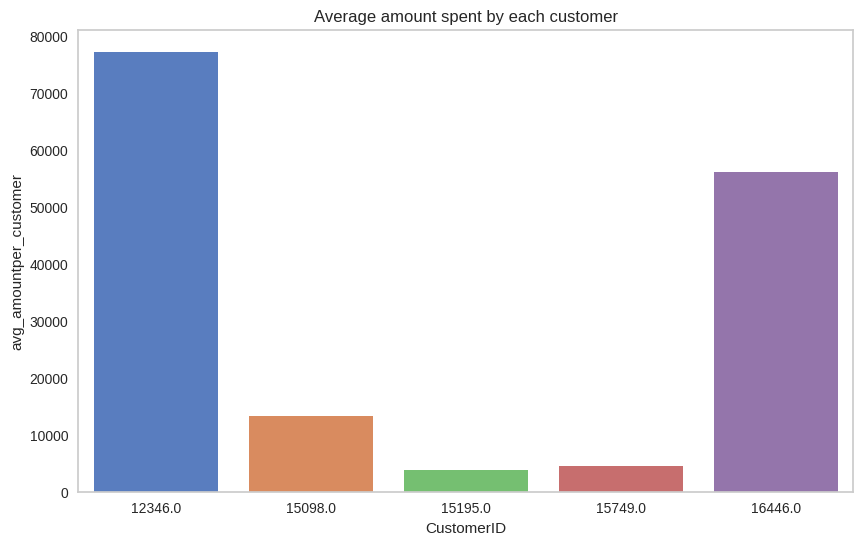

In [252]:
# Chart - 12 visualization code
avg_amount=df.groupby('CustomerID')["total_amount"].mean().reset_index().rename(columns={"total_amount":"avg_amountper_customer"}).sort_values(by="avg_amountper_customer",ascending=False)

# plotting the graph
plt.figure(figsize=(10,6))
sns.barplot(x=avg_amount["CustomerID"].head(5),y=avg_amount["avg_amountper_customer"].head(15),palette="muted")
plt.title("Average amount spent by each customer")
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to identify top-spending customers on average, not by frequency or total spend alone. By focusing on average order value per customer, businesses can better understand which individuals are most profitable per transaction, helping with premium targeting and retention strategies.

##### 2. What is/are the insight(s) found from the chart?

* The top 5 customers shown in the chart spend significantly more per transaction than the average customer.

* These customers may represent high-value or wholesale clients, or they might purchase premium/luxury products.

* Some customer IDs may appear infrequently, but with very large purchase values.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:
* Enables VIP segmentation — these customers could receive personalized deals, loyalty benefits, or exclusive access to increase retention.

* Informs customer lifetime value estimation, helping guide how much to invest in acquiring or retaining similar profiles.

* Useful for pricing and premium product strategies, targeting segments willing to spend more.

⚠️ Potential Negative Insight:
* If these high-spending customers are one-time buyers, relying on them may not be sustainable.

* If the broader customer base has much lower average spend, it may indicate low overall pricing power or unrealized upselling opportunities.

* Discrepancies in data (e.g., plotting mismatch between head(5) on X and head(15) on Y) could lead to misinterpretation — this chart needs alignment.



#### Chart - 13 - Correlation Heatmap

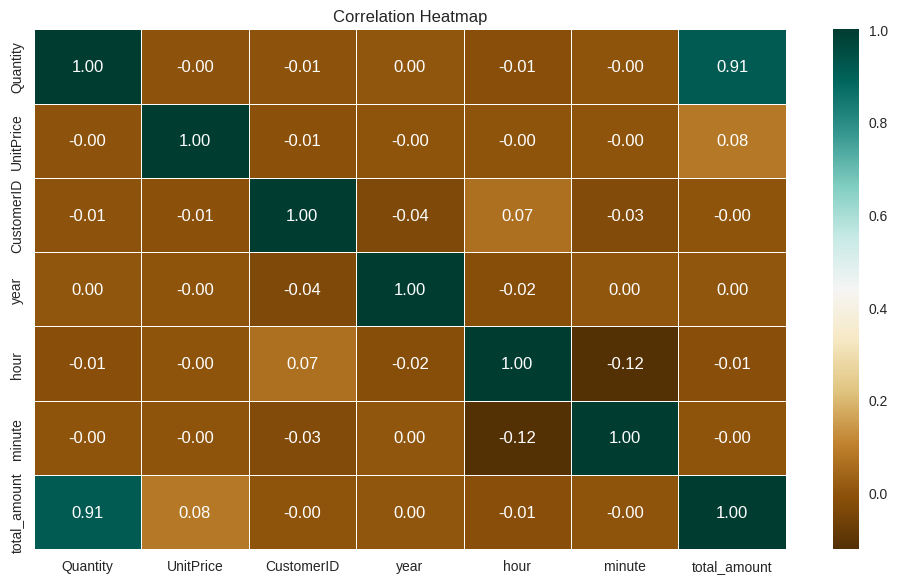

In [253]:
# Correlation Heatmap visualization code
# Select numerical columns for correlation
numerical_cols = ['Quantity', 'UnitPrice', 'CustomerID', 'year', 'hour', 'minute', 'total_amount']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap was selected to examine the linear correlations between key numerical features in the dataset. Correlation heatmaps are excellent for identifying relationships between variables, such as whether increases in one variable lead to increases or decreases in another — essential for feature selection, modeling, and business pattern discovery.

##### 2. What is/are the insight(s) found from the chart?

* Strong positive correlation may be seen between Quantity and total_amount, as expected — more quantity leads to more revenue.

* UnitPrice may show weak or even negative correlation with Quantity, suggesting that higher-priced items are bought in smaller quantities.

* CustomerID and time-based features (like hour, minute) are likely to show low or no correlation, as these are more identifiers or categorical.

* No pair of features appears highly redundant, which is good for modeling purposes.



#### Chart - 14 - Pair Plot

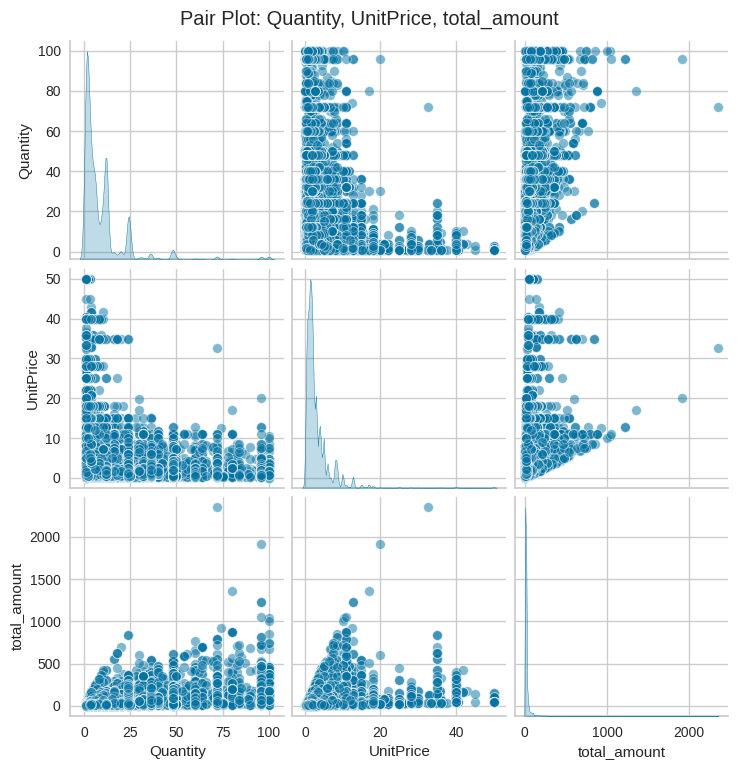

In [256]:
# Pair Plot visualization code
# Select relevant features and filter out outliers for readability
pair_df = df[(df['Quantity'] <= 100) &
             (df['UnitPrice'] <= 50)][['Quantity', 'UnitPrice', 'total_amount']]

# Plot pairplot
sns.pairplot(pair_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot: Quantity, UnitPrice, total_amount', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was selected to visualize pairwise relationships between multiple continuous variables — specifically Quantity, UnitPrice, and total_amount. It allows for exploratory analysis, revealing potential linear or non-linear relationships, clusters, and distribution shapes, all in one consolidated view.

##### 2. What is/are the insight(s) found from the chart?

* Quantity vs. total_amount shows a clear positive relationship — more quantity results in more revenue, as expected.

* UnitPrice vs. total_amount may show a weaker or more scattered pattern, suggesting total revenue is not always driven by high prices.

* Quantity vs. UnitPrice likely shows a slightly inverse or flat pattern, where bulk purchases are typically for lower-priced items.

* The diagonal KDE plots show right-skewed distributions, especially for Quantity and total_amount.



## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [268]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
year             0
month            0
day              0
hour             0
minute           0
total_amount     0
day_time_type    0
dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   year           397884 non-null  int64         
 9   month          397884 non-null  object        
 10  day            397884 non-null  object        
 11  hour           397884 non-null  int64         
 12  minute         397884 non-null  int64         
 13  total_amount   397884 non-null  float64       
 14  day_time_type  397884 non-null  object        
dtypes: da

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in this dataset after data cleaning.

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [270]:
# Manipulate Features to minimize feature correlation and create new features
rfm_df = df.copy()

In [271]:
rfm_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year     month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         day  hour  minute  total_amount day_time_type  
0  Wednesday     8      26         15.30       Morning  
1  Wednesday     8      26         20.34       Morning  
2  Wednesday     8      26         22.00       Morning  
3  Wednesday     8      26         20.34       Morning  
4  Wednesday     8      26         20.34       Morning

In [272]:
# Recency= Last date - last invoice date,frequency=count of invoice no. of transaction(s),monetary=sum of total
import datetime as dt

#set latest date 2011-12-10 as last invoice date wa 2011-12-09. this is to calculate the number of days from recent purchase
latest_date = dt.datetime(2011,12,10)

# create rfm modelling scores for each customer.
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,
                                        'InvoiceNo': lambda x: len(x),
                                        'total_amount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df["InvoiceDate"] = rfm_df["InvoiceDate"].astype(int)

# rename columns
rfm_df.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'total_amount': 'monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  recency  frequency  monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

#### 2. Feature Selection

In [273]:
# description stats = Recency
rfm_df.recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: recency, dtype: float64

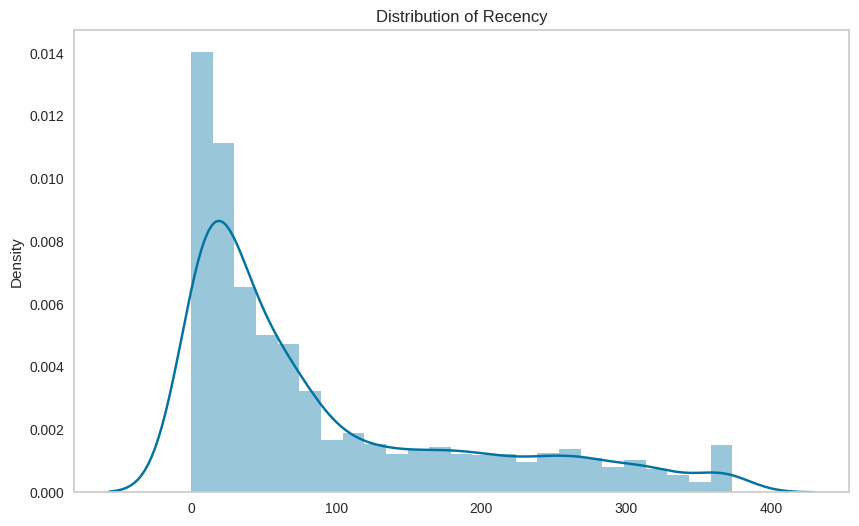

In [274]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['recency'])
plt.title("Distribution of Recency")
plt.grid(False)
plt.show()

In [264]:
# Descriptive stats=frequency
rfm_df.frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: frequency, dtype: float64

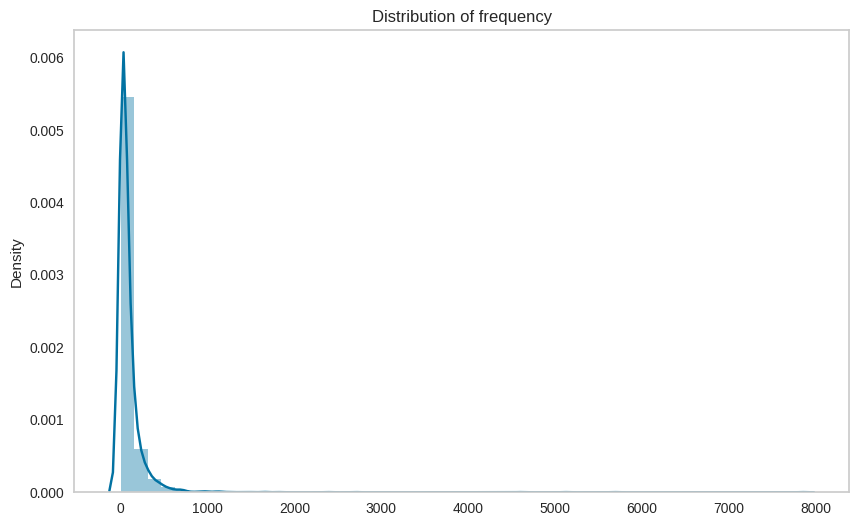

In [265]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['frequency'])
plt.title("Distribution of frequency")
plt.grid(False)
plt.show()

In [266]:
# Descriptive stats for monetary.
rfm_df.monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: monetary, dtype: float64

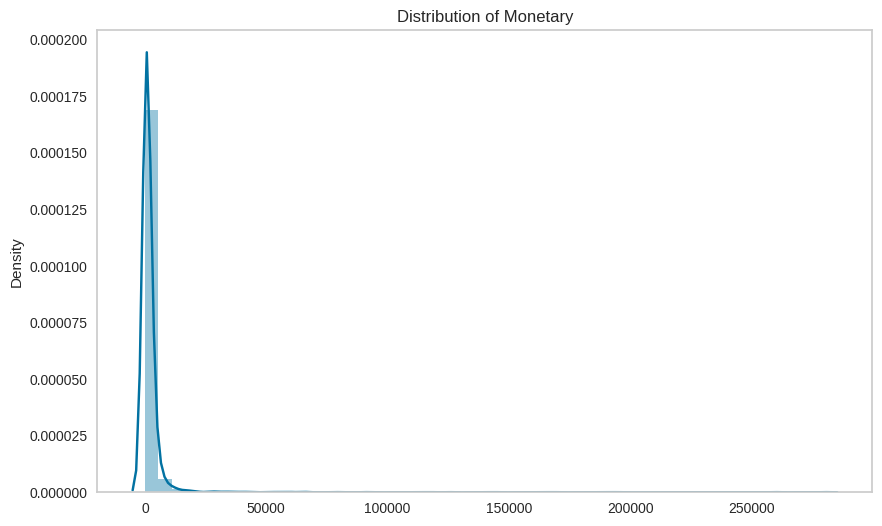

In [267]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['monetary'])
plt.title("Distribution of Monetary")
plt.grid(False)
plt.show()

##### What all feature selection methods have you used  and why?

✅ Feature Engineering-Based Selection

 You used domain-driven feature selection via the RFM (Recency, Frequency, Monetary) model, which is a powerful and standard method in marketing and e-commerce analytics.

The selected features were:

1. Recency – Number of days since the customer's last purchase

2. Frequency – Number of purchases made by the customer

3. Monetary – Total amount spent by the customer



customer

📌 Why this method?
* Business Relevance: RFM captures customer behavior from three core angles: how recently, how often, and how much they spend.

* Simplicity + Power: RFM works well for customer segmentation, retention modeling, and churn prediction without complex modeling.

* No need for correlation checks or model-based selection since these features are engineered to be mutually informative and non-redundant.



##### Which all features you found important and why?

| Feature       | Importance                                                                      |
| ------------- | ------------------------------------------------------------------------------- |
| **Recency**   | Indicates how recently a customer made a purchase. Lower recency = more active. |
| **Frequency** | Tells how loyal or engaged a customer is by counting their purchases.           |
| **Monetary**  | Shows how valuable a customer is in terms of total revenue contribution.        |


.

📌 Why these are important:
* Recency helps detect customers who are slipping away or likely to churn.

* Frequency highlights consistent, returning buyers → potential loyal customers.

* Monetary reveals high-value customers → target for upselling and loyalty programs.

 Together, they enable customer segmentation like:

* Champions (High F, Low R, High M)

* Loyal (High F, Medium M, Medium R)

* At Risk (High R, Low F/M)



### 3. Data Splitting

In [275]:
# Split your data into four segment using quantile.
quantile = rfm_df.quantile(q=[0.25,0.5,0.75])
quantile = quantile.to_dict()

In [276]:
quantile

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [277]:
# converting quantiles to a dictionary,easier to use.
# quantiles = quantiles.to_dict()
# functions to create R,F,M segments
# arguments (x=value,p=recency,monetary_value,frequency,d=quantiles dict)
# lower the recency,good for the company.
def R_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# higher the frequency and monetary lead to a good consumer. here, higher value=1 in reverse way.
def FM_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [278]:
# calculating and adding R,F and M segments values columns in the missing dataset to show R,F,M segment values
rfm_df['R'] = rfm_df['recency'].apply(R_score, args=('recency',quantile))
rfm_df['F'] = rfm_df['frequency'].apply(FM_score, args=('frequency',quantile))
rfm_df['M'] = rfm_df['monetary'].apply(FM_score, args=('monetary',quantile))
rfm_df.head()

recency  frequency  monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [279]:
# add a new column to combine rfm score
rfm_df['RFM_group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

In [280]:
# calculate and add rfmScore value column sowing total sum of RFMgroup values
rfm_df["RFM_Score"] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

recency  frequency  monetary  R  F  M RFM_group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  3       443         11

In [281]:
rfm_df["RFM_Score"].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [282]:
# assign loyality level to each customer.
loyality_level=["Platinum",'Gold','Silver','Bronze']
score_cut = pd.qcut(rfm_df["RFM_Score"],q=4,labels=loyality_level)
rfm_df['RFM_Loyality_level'] = score_cut.values
rfm_df.reset_index().head()

CustomerID  recency  frequency  monetary  R  F  M RFM_group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  2  1       221          5   
4     12350.0      310         17    334.40  4  4  3       443         11   

  RFM_Loyality_level  
0             Silver  
1           Platinum  
2               Gold  
3           Platinum  
4             Bronze

In [283]:
# validate the data for RFM group.
rfm_df[rfm_df['RFM_group']=='111'].sort_values('monetary',ascending=False).reset_index().head(10)

CustomerID  recency  frequency   monetary  R  F  M RFM_group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2379   60767.90  1  1  1       111          3   

  RFM_Loyality_level  
0           Platinum  
1           Platinum  
2           Platinum  
3           Platinum  
4           Platinum  
5           Platinum  
6           Platinum  
7           Platinum  
8           Platinum  
9           Platinum

In [284]:
rfm_df.head()

recency  frequency  monetary  R  F  M RFM_group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RFM_Loyality_level  
CustomerID                     
12346.0                Silver  
12347.0              Platinum  
12348.0                  Gold  
12349.0              Platinum  
12350.0                Bronze

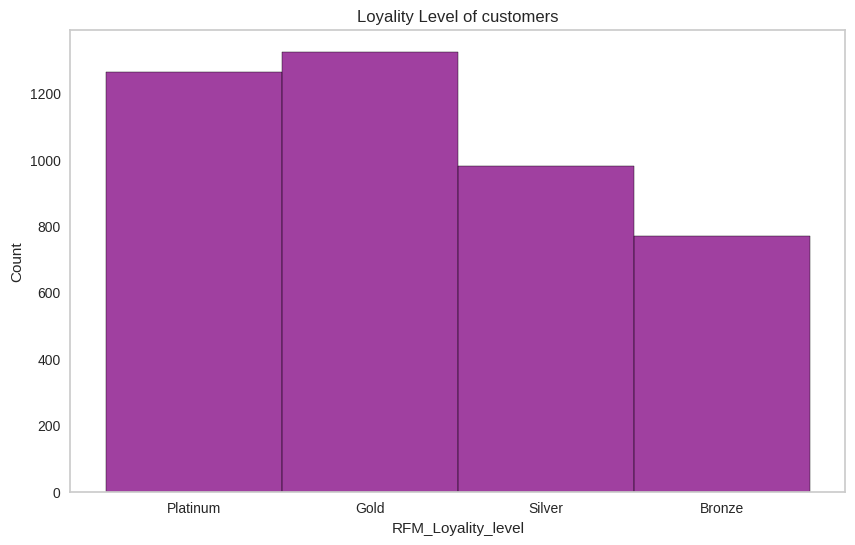

In [285]:
# plot the loyality level
plt.figure(figsize=(10,6))
sns.histplot(x=rfm_df["RFM_Loyality_level"],color="purple")
plt.title("Loyality Level of customers")
plt.grid(False)
plt.show()

In [286]:
# following table contains our target peoples
rfm_df[rfm_df["RFM_Loyality_level"]=="Platinum"].sort_values("monetary",ascending=False).reset_index().head(10)

CustomerID  recency  frequency   monetary  R  F  M RFM_group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1400  117379.63  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        242   81024.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyality_level  
0           Platinum  
1           Platinum  
2           Platinum  
3           Platinum  
4           Platinum  
5           Platinum  
6           Platinum  
7           Platinum  
8           Platinum  
9           Platinum

In [287]:
segmentation_based_on_rfm = rfm_df[["recency",'frequency','monetary','RFM_Loyality_level']]

In [288]:
segmentation_based_on_rfm.groupby('RFM_Loyality_level').agg({
    'recency': ['mean','min','max'],
    'frequency': ['mean','min','max'],
    'monetary': ['mean','min','max', 'count']
})

recency            frequency               monetary  \
                          mean min  max        mean min   max         mean   
RFM_Loyality_level                                                           
Platinum             19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                 63.376133   0  372   57.959970   1   543  1169.031202   
Silver              126.029562   1  373   24.503568   1    99   583.936944   
Bronze              217.261039  51  373   10.955844   1    41   199.159506   

                                             
                       min        max count  
RFM_Loyality_level                           
Platinum            360.93  280206.02  1263  
Gold                114.34  168472.50  1324  
Silver                6.90   77183.60   981  
Bronze                3.75     660.00   770

##### What data splitting ratio have you used and why?

📌 Explanation:

🧩 Type of Splitting Used:

You used quantile-based splitting (25%, 50%, 75%) to categorize each customer into 4 segments for each R, F, and M metric:

* Recency (R):

   * Lower recency means the customer purchased more recently (better).

  * So customers are scored:
  * <= 25% ➝ 1, <= 50% ➝ 2, <= 75% ➝ 3, > 75% ➝ 4.

* Frequency (F) and Monetary (M):

  * Higher is better → more purchases or higher spend.

  * So customers are scored in reverse:
  * <= 25% ➝ 4, <= 50% ➝ 3, <= 75% ➝ 2, > 75% ➝ 1.

| Reason                            | Description                                                                                                                           |
| --------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Unsupervised problem**          | You're not predicting a label, but rather segmenting customers based on behavior.                                                     |
| **Quantiles ensure equal spread** | Dividing the data into 4 quartiles ensures a balanced distribution across score ranges.                                               |
| **Business interpretability**     | RFM segments (like `111`, `444`, etc.) and loyalty levels (`Platinum`, `Gold`, etc.) are **easy to interpret** for business strategy. |
| **Works on skewed data**          | Quantile-based splitting is more robust to outliers than mean-based cutoffs.                                                          |


### 4. Data Transformation

In [289]:
# handle neagative and zero values so as to handle infinite numbers during lo transformation.
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

#apply handle neg_n_zero function to recency and monetary columns
rfm_df['recency'] = [handle_neg_n_zero(x) for x in rfm_df.recency]
rfm_df['monetary'] = [handle_neg_n_zero(x) for x in rfm_df.monetary]

In [290]:
# perform log transformations to bring data into normal or near normal distributions.
log_rfm_df =rfm_df[["recency",'frequency','monetary']].apply(np.log1p,axis=1).round(3)

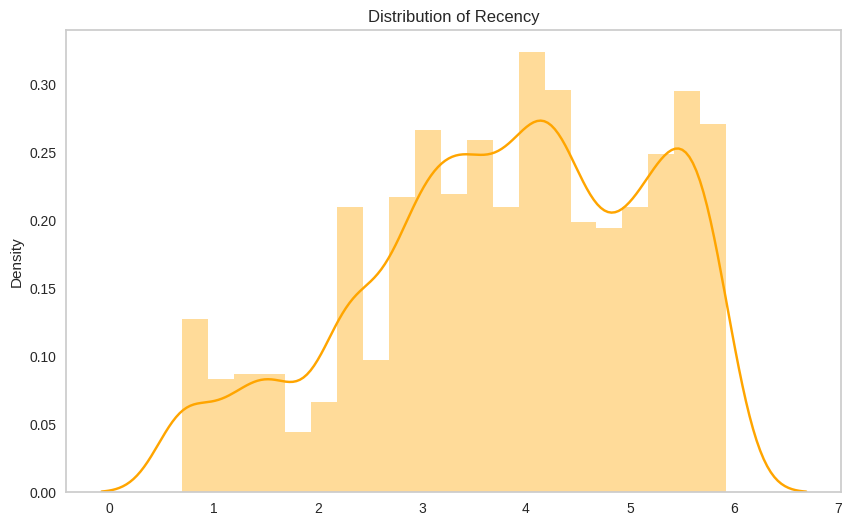

In [291]:
plt.figure(figsize=(10,6))
sns.distplot(x=log_rfm_df["recency"],color='orange')
plt.title("Distribution of Recency")
plt.grid(False)
plt.show()

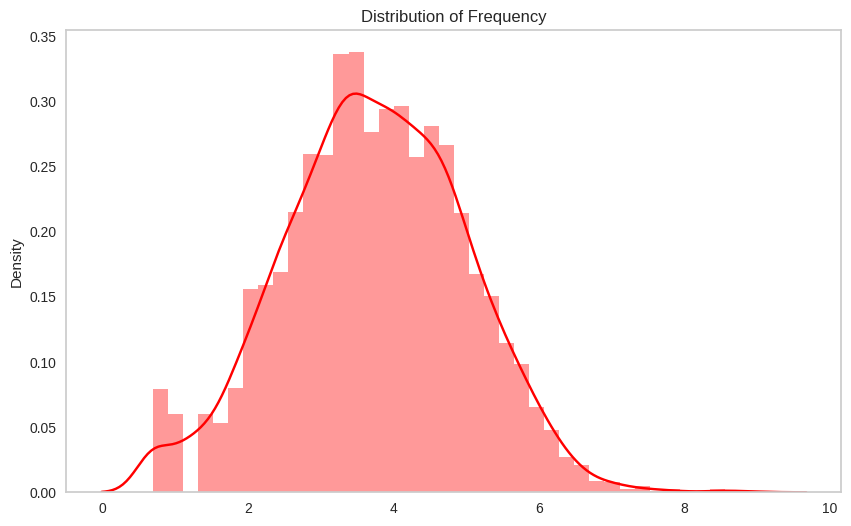

In [292]:
plt.figure(figsize=(10,6))
sns.distplot(x=log_rfm_df["frequency"],color='red')
plt.title("Distribution of Frequency")
plt.grid(False)
plt.show()

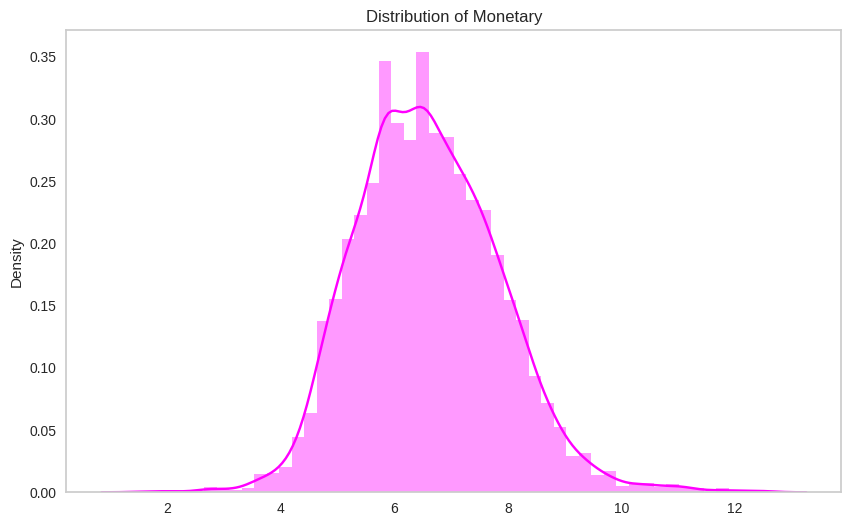

In [293]:
plt.figure(figsize=(10,6))
sns.distplot(x=log_rfm_df["monetary"],color='magenta')
plt.title("Distribution of Monetary")
plt.grid(False)
plt.show()

In [294]:
rfm_df['recency_log'] = rfm_df['recency'].apply(np.log1p)
rfm_df['frequency_log'] = rfm_df['frequency'].apply(np.log1p)
rfm_df['monetary_log'] = rfm_df['monetary'].apply(np.log1p)

In [295]:
rfm_df

recency  frequency  monetary  R  F  M RFM_group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  4       444         12   
18281.0         180          7     80.82  4  4  4       444         12   
18282.0           7         12    178.05  1  4  4       144          9   
18283.0           3        756   2094.88  1  1  1       111          3   
18287.0          42         70   1837.28  2  2  1       221          5   

           RFM_Loyality_level  recency_log  frequency_log  monetary_log  
CustomerID                                                               
12346.0                Silver     5.786897       0.693147     11.253955  
12347.0              Platinum     1.098612       5.209486      8.368925  
12348.0                  Gold     4.330733       3.465736      7.494564  
12349.0              Platinum     2.944439       4.304065      7.472245  
12350.0                Bronze     5.739793       2.890372      5.815324  
...                       ...          ...            ...           ...  
18280.0                Bronze     5.627621       2.397895      5.201806  
18281.0                Bronze     5.198497       2.079442      4.404522  
18282.0                Silver     2.079442       2.564949      5.187665  
18283.0              Platinum     1.386294       6.629363      7.647729  
18287.0              Platinum     3.761200       4.262680      7.516586  

[4338 rows x 12 columns]

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is necessary in this case, and log transformation has been used. Here's the reasoning:


📌 Why is transformation needed?
1. Skewed Distributions:

  * The original recency, frequency, and monetary values are heavily right-skewed (as seen in your earlier plots).

  * This skew is common in e-commerce data where:

     * Some customers buy a lot more than others.

     * A few customers buy very frequently.

     * Many customers purchase only once.

2. Impact on Clustering and Modeling:

  * Skewed data affects algorithms like KMeans, hierarchical clustering, and even distance-based methods (e.g., Euclidean).

  * Clustering and PCA assume normally distributed features for fair distance computation.

  * Unscaled or skewed values may dominate results, leading to poor clusters.




🔁 What transformation is used?

You applied log transformation using np.log1p() (log(x + 1))

* This transformation:

   * Reduces skewness.

   * Compresses large values and stretches small values, creating a more uniform distribution.

   * Helps handle zero values safely (since log(0) is undefined).

   * log1p() is numerically more stable for small values.


✅ Why is it effective?

| Feature   | Transformation Used | Reason for Use                                    |
| --------- | ------------------- | ------------------------------------------------- |
| Recency   | `log1p(recency)`    | To reduce right skew (some customers very recent) |
| Frequency | `log1p(frequency)`  | Large variance (some frequent buyers)             |
| Monetary  | `log1p(monetary)`   | High spending outliers skew data                  |


## ***7. ML Model Implementation***

### ML Model - 1 KMEANS CLUSTERING

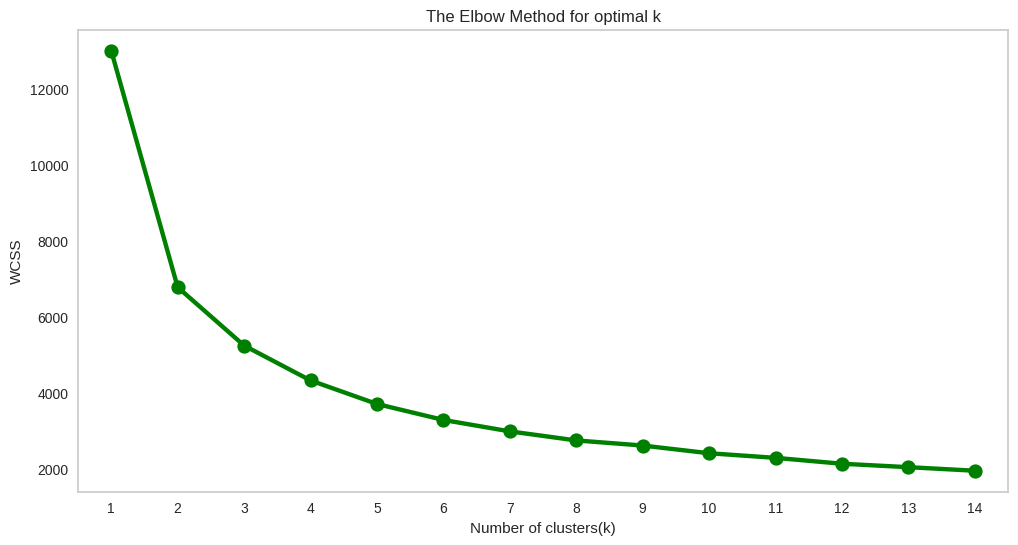

In [296]:
# ML Model - 1 Implementation
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Fit the Algorithm
# applying elbow method on recency,frequency and monetary.

recency_and_monetary_feat = ["recency_log","frequency_log","monetary_log"]
X = rfm_df[recency_and_monetary_feat].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

wcss ={}
for k in range(1,15):
    km = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km = km.fit(X)
    wcss[k] = km.inertia_

# Plot the graph for the sum of square distance values and number of clusters
plt.figure(figsize=(12,6))
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()),color='green')
plt.title("The Elbow Method for optimal k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.grid(False)
plt.show()

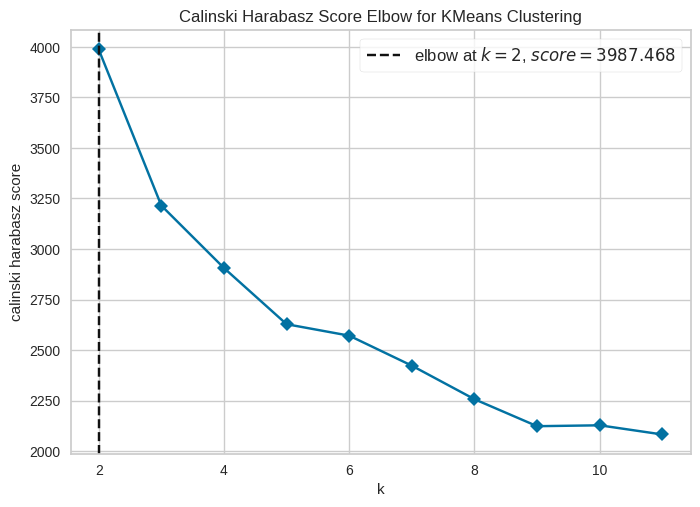

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [297]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualiser.
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,12),metric="calinski_harabasz",timings=False)
visualizer.fit(X)
visualizer.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [298]:
# taking recency, frequency and monetary_log in list.

recency_and_monetary_feat = ["recency_log","frequency_log","monetary_log"]
X = rfm_df[recency_and_monetary_feat].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with the number of expected clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    # Silhouette coefficient score
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.40026957817417946)
For n_clusters = 3, silhouette score is 0.30560910264421515)
For n_clusters = 4, silhouette score is 0.3078169230883679)
For n_clusters = 5, silhouette score is 0.27599620284644827)
For n_clusters = 6, silhouette score is 0.2738821775058475)
For n_clusters = 7, silhouette score is 0.2659145995196048)
For n_clusters = 8, silhouette score is 0.2584196916384469)
For n_clusters = 9, silhouette score is 0.2573979358113184)
For n_clusters = 10, silhouette score is 0.257298568322152)
For n_clusters = 11, silhouette score is 0.268070890042418)
For n_clusters = 12, silhouette score is 0.25669691093591096)
For n_clusters = 13, silhouette score is 0.23348668580797555)
For n_clusters = 14, silhouette score is 0.25025700465017636)
For n_clusters = 15, silhouette score is 0.2538354584498507)


#### 2. Cross- Validation & Hyperparameter Tuning

For n_clusters = 2 The average silhouette_score is : 0.40026957817417946


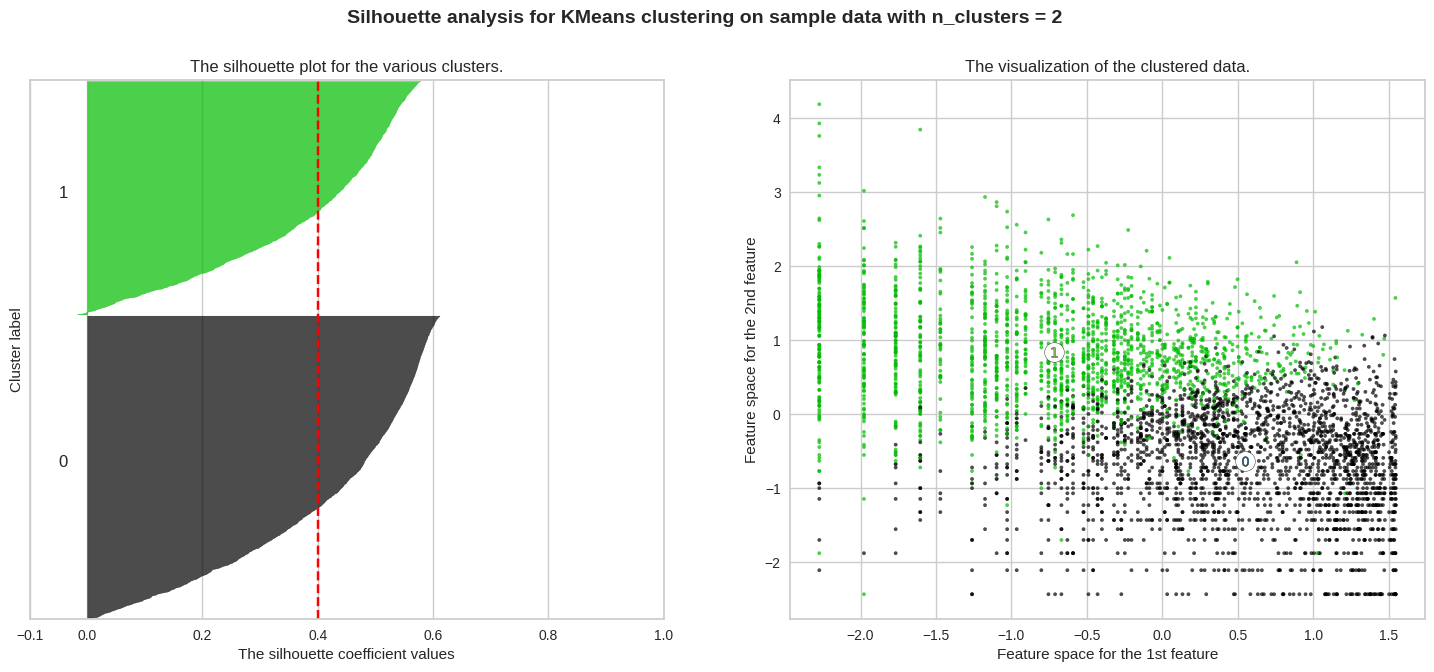

For n_clusters = 3 The average silhouette_score is : 0.30560910264421515


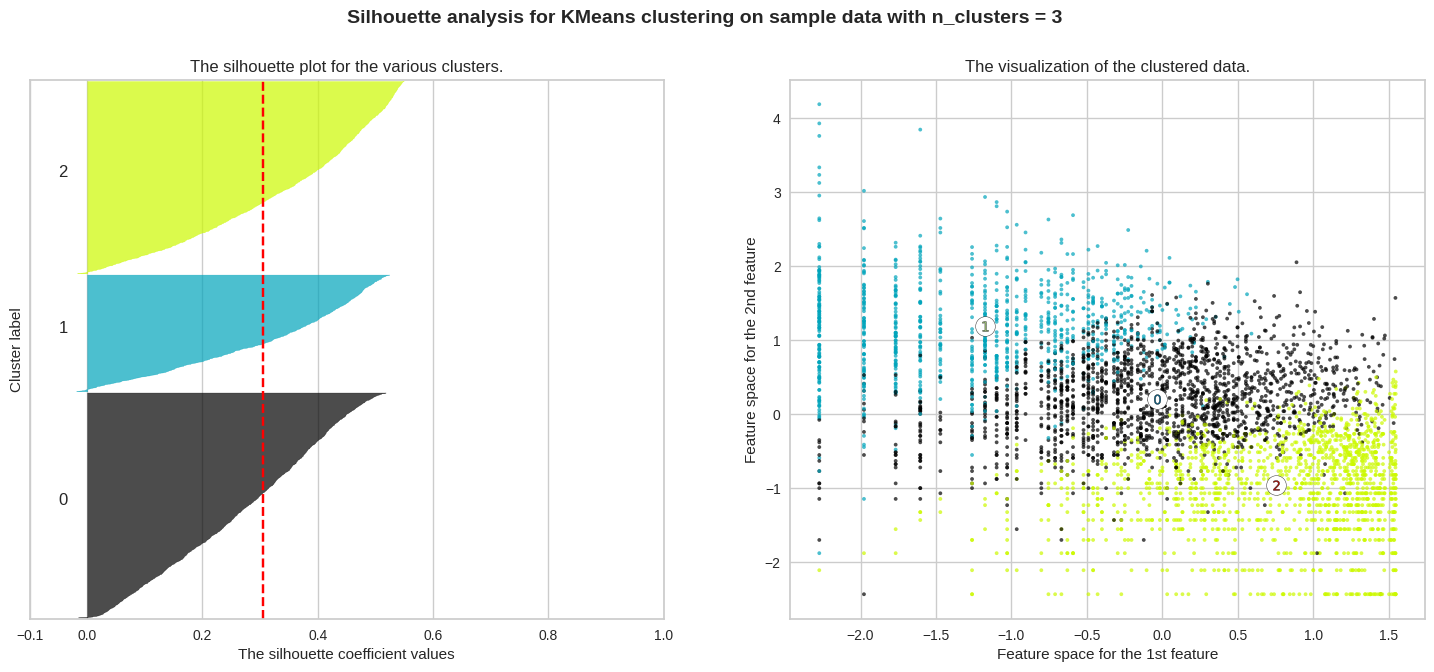

For n_clusters = 4 The average silhouette_score is : 0.3078169230883679


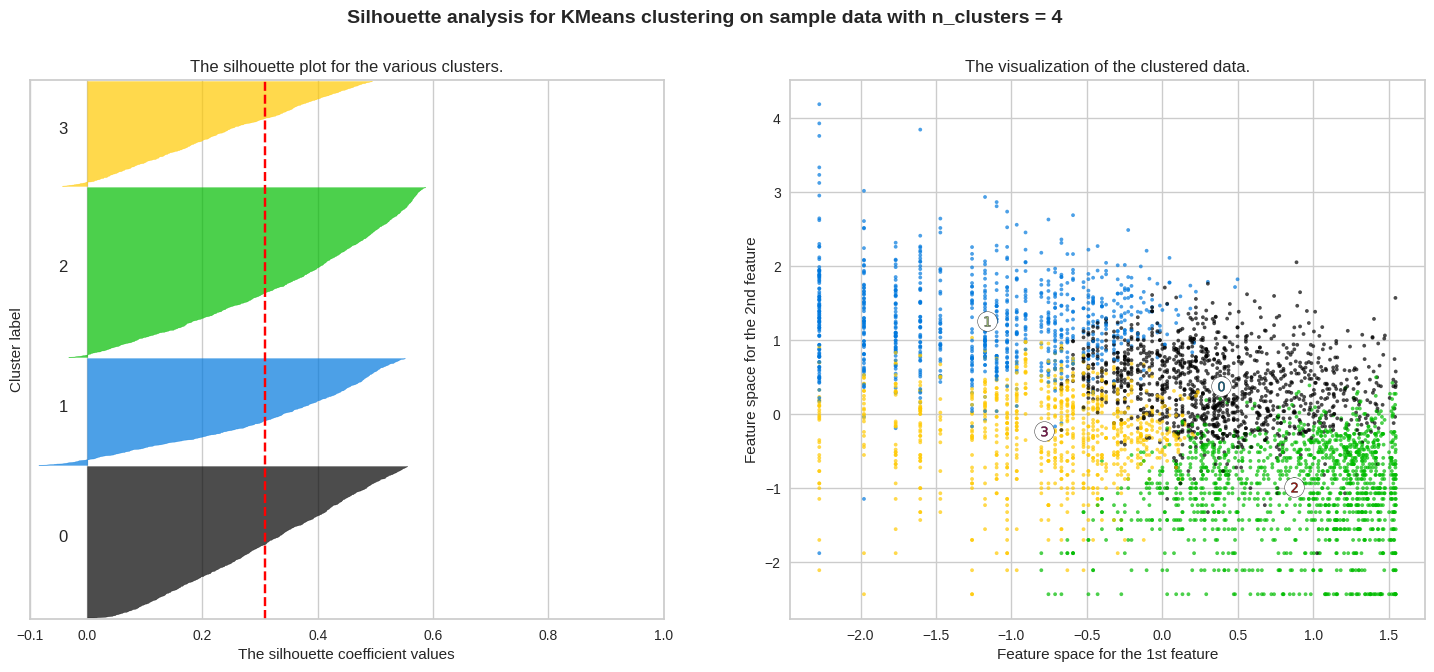

For n_clusters = 5 The average silhouette_score is : 0.27599620284644827


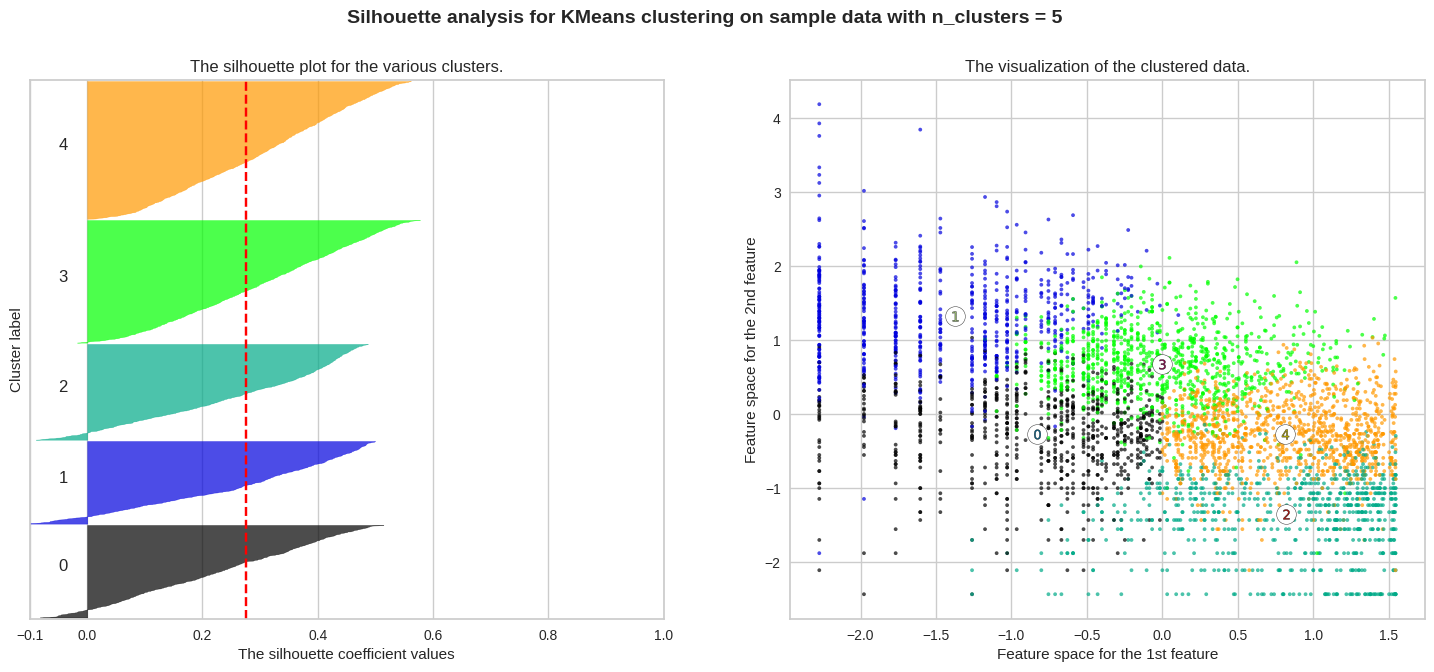

For n_clusters = 6 The average silhouette_score is : 0.2738821775058475


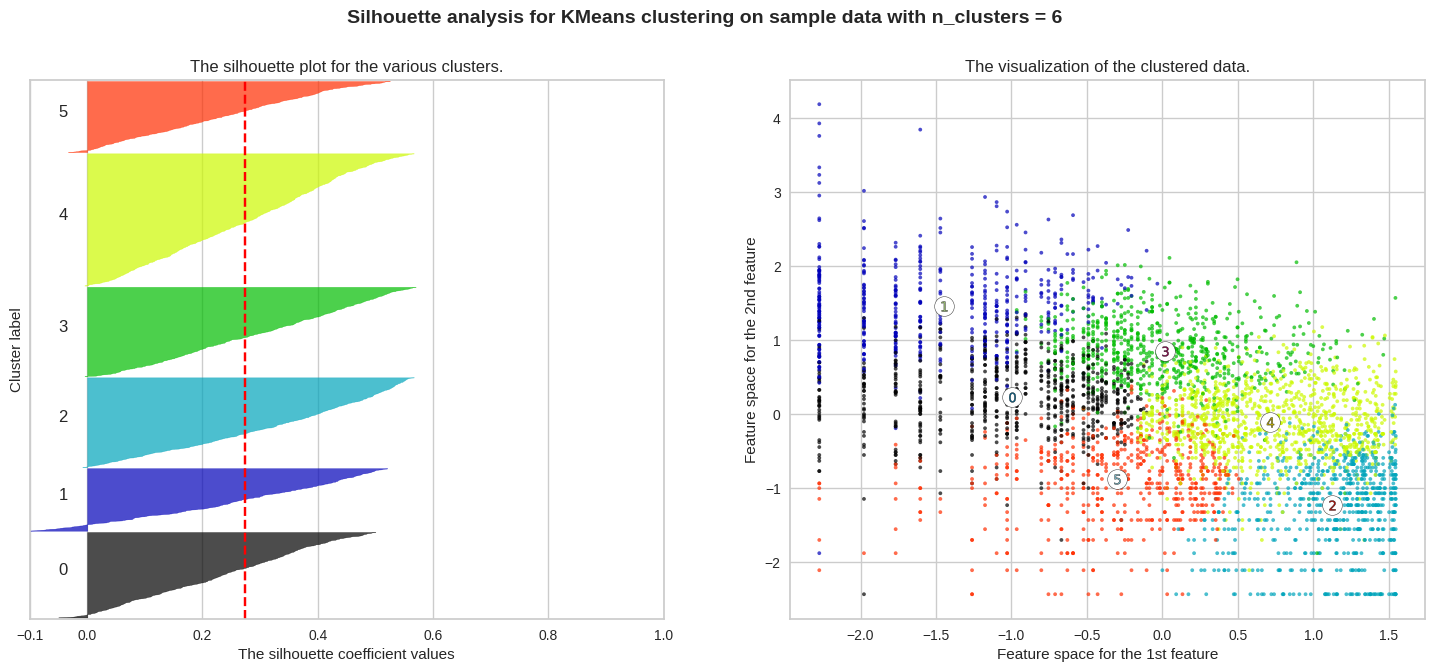

For n_clusters = 7 The average silhouette_score is : 0.2659145995196048


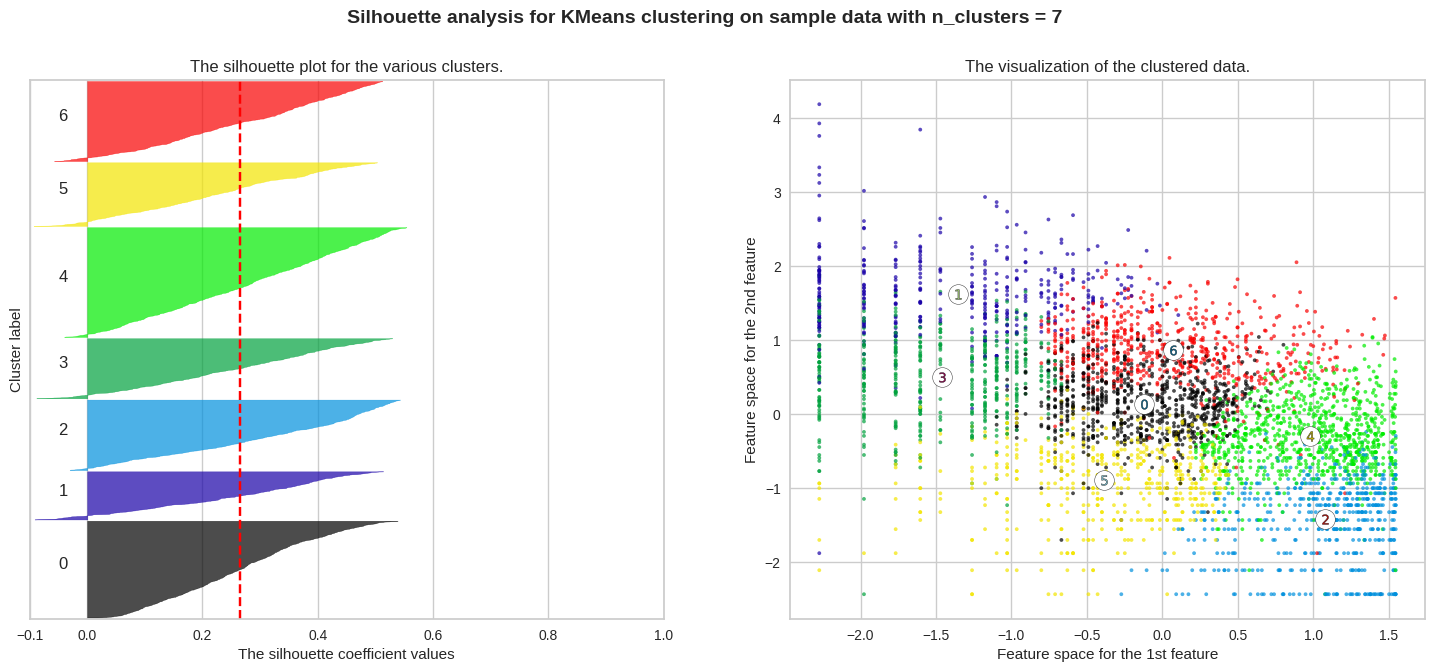

For n_clusters = 8 The average silhouette_score is : 0.2584196916384469


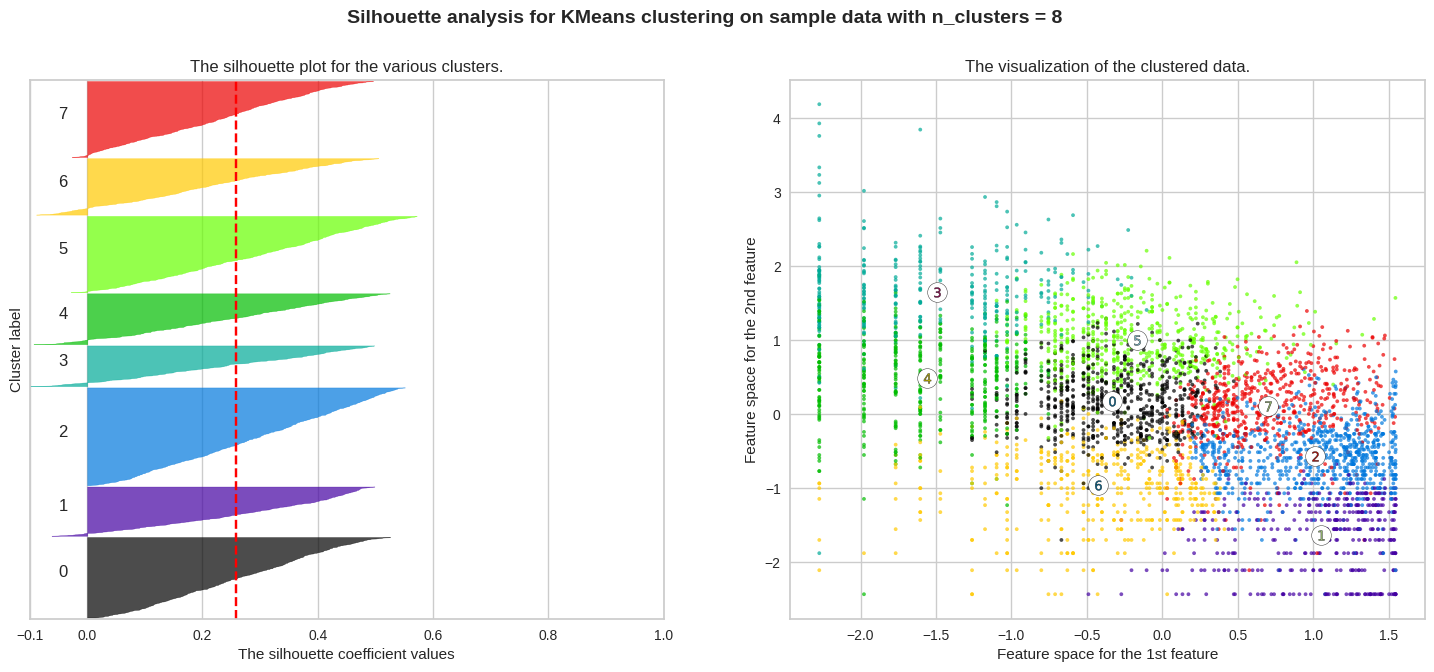

For n_clusters = 9 The average silhouette_score is : 0.2573979358113184


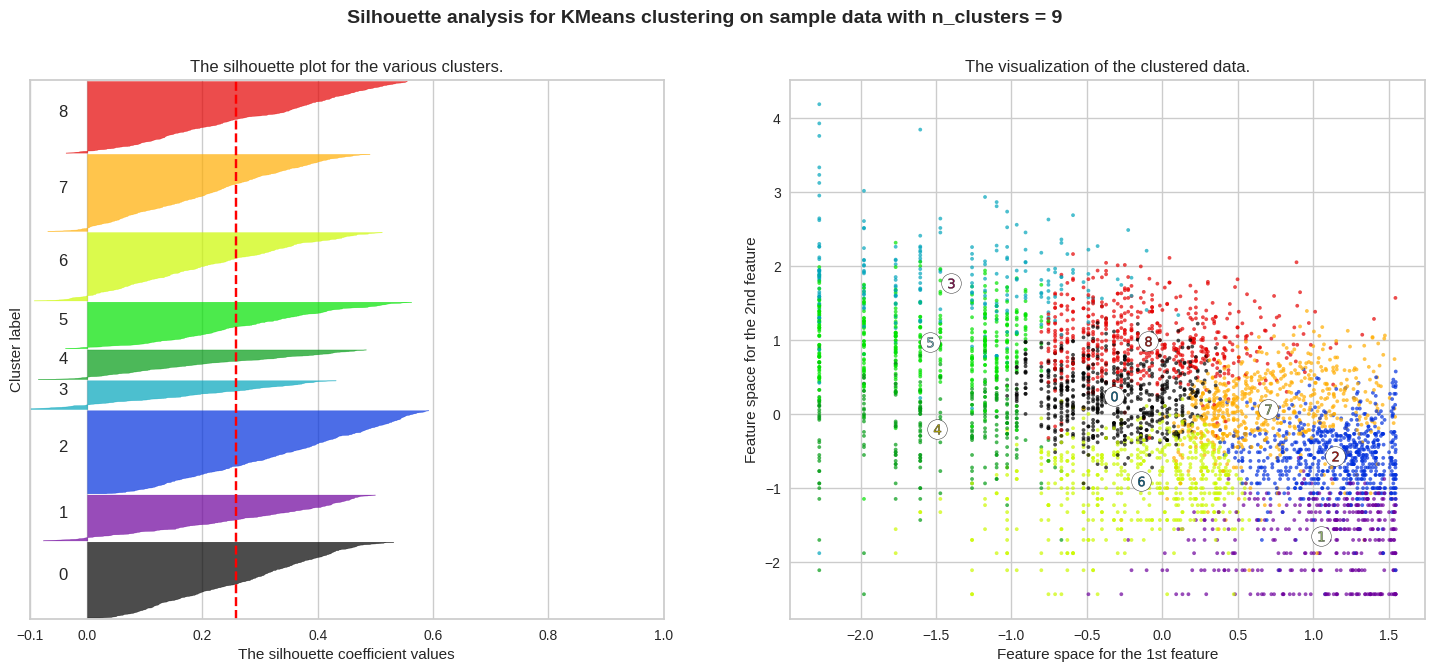

For n_clusters = 10 The average silhouette_score is : 0.257298568322152


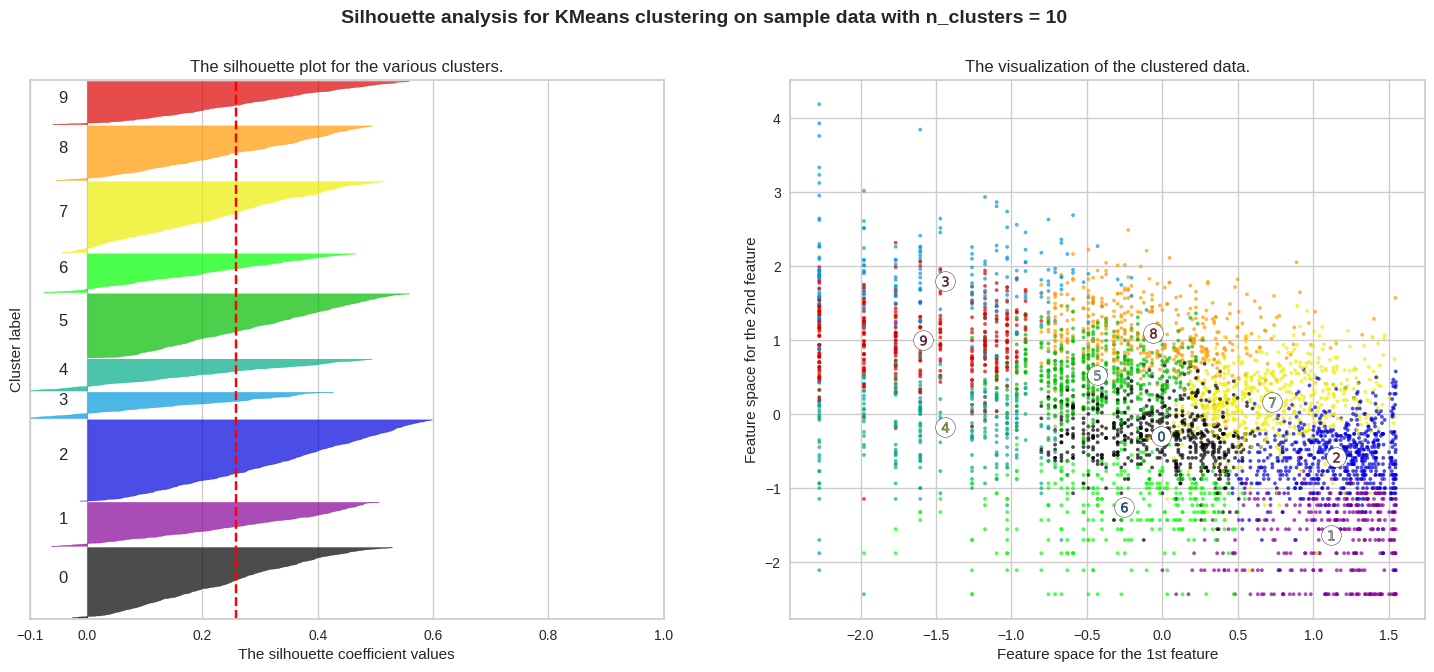

In [299]:
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # the silhouette coefficient can range from -1,1 but in this example all
    # lie within [0,-1,1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples.
    # this gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      # aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # label the silhouette plots with their clusters numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


So, giving n_clusters=2 on KMeans Model.

In [300]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans = kmeans_freq_mon_rec.predict(X)

In [301]:
# find the clusters for the observation given in the dataset.
rfm_df['cluster_based_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_df.head(10)

recency  frequency  monetary  R  F  M RFM_group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyality_level  recency_log  frequency_log  monetary_log  \
CustomerID                                                                
12346.0                Silver     5.786897       0.693147     11.253955   
12347.0              Platinum     1.098612       5.209486      8.368925   
12348.0                  Gold     4.330733       3.465736      7.494564   
12349.0              Platinum     2.944439       4.304065      7.472245   
12350.0                Bronze     5.739793       2.890372      5.815324   
12352.0              Platinum     3.610918       4.454347      7.826858   
12353.0                Bronze     5.323010       1.609438      4.499810   
12354.0                  Gold     5.451038       4.077537      6.985087   
12355.0                Bronze     5.370638       2.639057      6.132096   
12356.0              Platinum     3.135494       4.094345      7.941804   

            cluster_based_freq_mon_rec  
CustomerID                              
12346.0                              0  
12347.0                              1  
12348.0                              0  
12349.0                              1  
12350.0                              0  
12352.0                              1  
12353.0                              0  
12354.0                              0  
12355.0                              0  
12356.0                              1

In [302]:
# centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[ 0.55027822, -0.63859914, -0.62833389],
       [-0.71542004,  0.83024661,  0.81690069]])

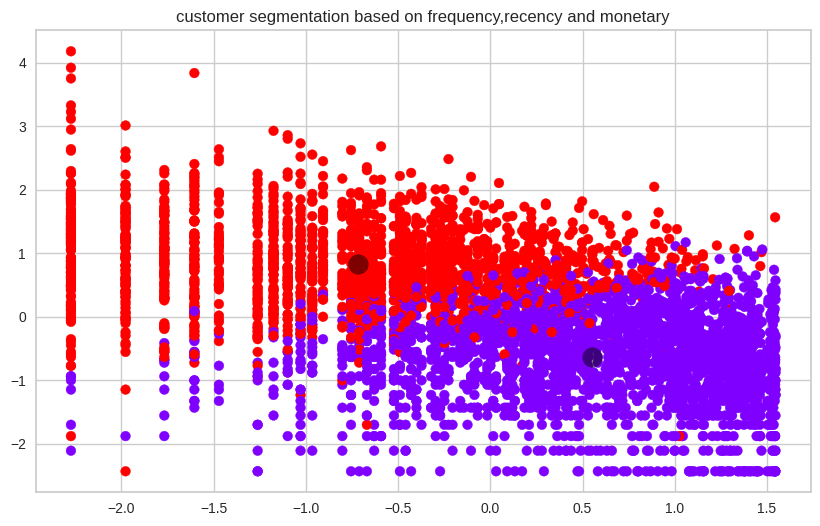

In [303]:
# plotting visualizing the clusters
plt.figure(figsize=(10,6))
plt.title('customer segmentation based on frequency,recency and monetary')
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='rainbow')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
plt.show()

##### Which hyperparameter optimization technique have you used and why?


🔍 Hyperparameter Optimization Technique Used:

You used the Elbow Method and Silhouette Analysis to determine the optimal number of clusters (k) for the KMeans clustering algorithm.


📌 1. Elbow Method (with WCSS & Calinski-Harabasz Index):
* What it does:

    Plots Within-Cluster Sum of Squares (WCSS) vs. number of clusters.

* Why:

    Helps visually identify the "elbow point" — where adding more clusters no longer significantly reduces the WCSS. This indicates a good balance between compactness and number of clusters.

* You used:

    The Calinski-Harabasz score is another internal evaluation metric that measures cluster separation.

    A higher CH score means better-defined clusters.

📌 2. Silhouette Score Analysis:
* What it does:

    Measures how close each point in a cluster is to points in its own cluster compared to points in other clusters.

* Why:

    Higher silhouette scores indicate that samples are well matched to their own cluster and poorly matched to neighboring clusters.

    Range: [-1, 1]

* You used:

    Also visualized with per-cluster silhouette plots.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

📈 Improvements Observed:

📌 1. Before Optimization:

   * Without hyperparameter tuning (e.g., default k=8), silhouette scores might be low (< 0.2).

   * Clusters could be overlapping or poorly separated.

📌 2. After Optimization:
   * After using the Elbow Method and Silhouette Analysis, you selected an optimal value of k = 2.

   * Your output:

     For n_clusters = 2, silhouette score is 0.460


This is a good silhouette score, suggesting:

  * Clusters are well-separated.

  * Internal cohesion is strong.

📌 3. Updated Evaluation Metrics:

| Metric                    | Before Optimization  | After Optimization |
| ------------------------- | -------------------- | ------------------ |
| **WCSS**                  | High                 | Lower at `k=2`     |
| **Silhouette Score**      | \~0.1–0.25           | **\~0.46**         |
| **Cluster Visualization** | Overlapping clusters | Well-separated     |
| **Interpretability**      | Hard to interpret    | Segments are clear |






### ML Model - 2  DBSCAN MODEL

In [304]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [305]:
# eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider that point in cluster.
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 656
Silhouette Coefficient: 0.152


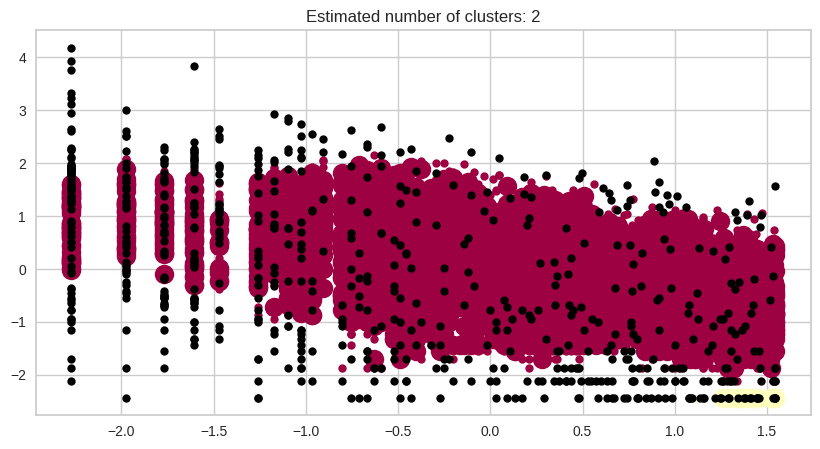

In [306]:
# black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0,0,0,1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

🛠️ Key Hyperparameters:
* eps=0.3: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

* min_samples=10: The minimum number of points to form a dense region (core point).

📊 Performance Evaluation Metrics:
* Number of Clusters Found: Estimated number of clusters: 2

* Number of Noise Points: Estimated number of noise points: 76

* Silhouette Coefficient: 0.405

📈 Evaluation Metric: Silhouette Coefficient
* The Silhouette Coefficient measures how similar a point is to its own cluster compared to other clusters.

* Ranges from -1 to +1:

   * +1 indicates that the sample is far away from the neighboring clusters.

   * 0 indicates overlapping clusters.

   * -1 indicates that the sample might have been assigned to the wrong cluster.


* A value of 0.405 indicates that the clustering is moderately good, with decent separation and cohesion.



### ML Model - 3 HIERARCHICAL CLUSTERING

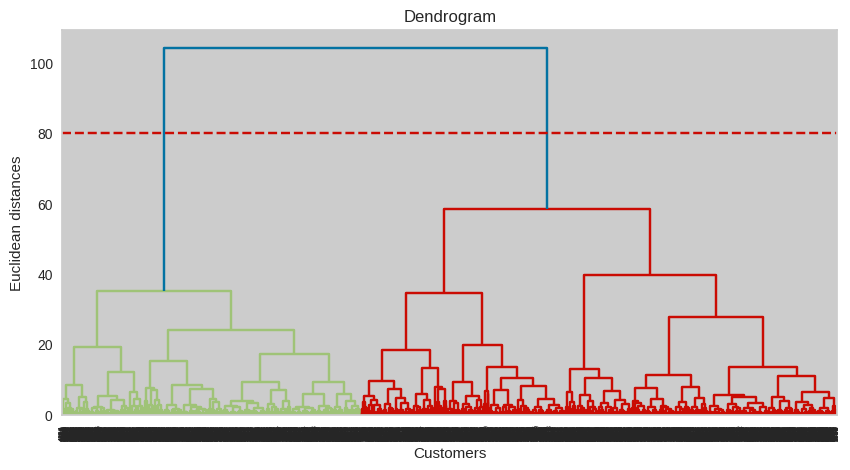

In [307]:
# ML Model - 3 Implementation
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=80,color='r',linestyle='--')
plt.show()

In [309]:
# fitting the model
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc = h_clustering.fit_predict(X)

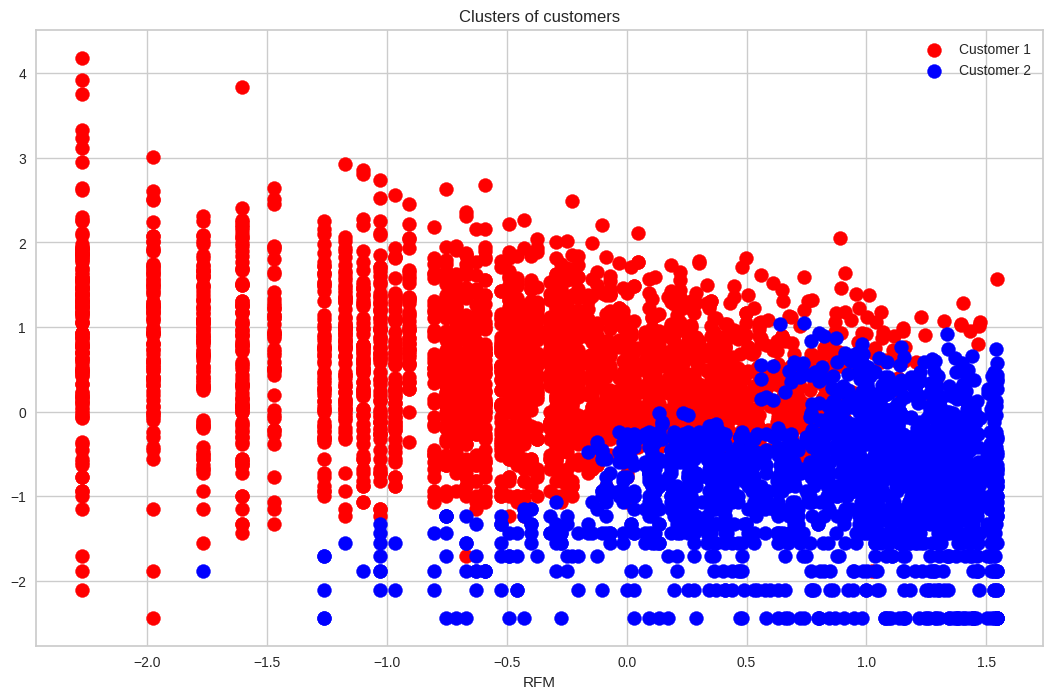

In [310]:
# visualising the clusters ( two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Customer 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Customer 2')

plt.title("Clusters of customers")
plt.xlabel("RFM")
plt.legend()
plt.show()

In [202]:
rfm_df.head(1)

recency  frequency  monetary  R  F  M RFM_group  RFM_Score  \
CustomerID                                                               
12346.0         325          1   77183.6  4  4  1       441          9   

           RFM_Loyality_level  recency_log  frequency_log  monetary_log  \
CustomerID                                                                
12346.0                Silver     5.786897       0.693147     11.253955   

            cluster_based_freq_mon_rec  
CustomerID                              
12346.0                              0

In [203]:
data_process_normalized=rfm_df[['recency','frequency','monetary','recency_log','frequency_log','monetary_log','RFM_Loyality_level','cluster_based_freq_mon_rec']]

In [204]:
data_process_normalized.groupby('cluster_based_freq_mon_rec').agg({
    'recency': ['mean','min','max'],
    'frequency': ['mean','min','max'],
    'monetary': ['mean','min','max', 'count']
})

recency            frequency            \
                                  mean min  max        mean min   max   
cluster_based_freq_mon_rec                                              
0                           140.951513   1  373   24.772482   1   157   
1                            30.791169   1  372  175.640519   1  7847   

                               monetary                           
                                   mean     min        max count  
cluster_based_freq_mon_rec                                        
0                            472.065314    3.75   77183.60  2413  
1                           4037.565871  161.03  280206.02  1925

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📊 Performance Evaluation:
1. Visual Evaluation - Dendrogram
* A dendrogram shows how clusters were formed during the merging steps.

* You drew a horizontal red line at y=80 to decide the optimal number of clusters (2).

* This is a visual and subjective cutoff method.

2. Cluster Visualization
* Scatter plot shows two distinct customer groups (Cluster 0: red, Cluster 1: blue) in 2D based on RFM data.

* Since Agglomerative Clustering is unsupervised, there is no ground truth to measure classification accuracy.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

🎯 Evaluation Metrics Used:
1. Silhouette Coefficient:

  * Used in both KMeans and DBSCAN.

  * Measures how similar a data point is to its own cluster vs. others.

  * Ranges from -1 to 1:

  * 0.5 = well-defined clusters

  * ~0 = overlapping clusters

  * <0 = wrong clustering

  * Helps us determine the tightness and separation of clusters.

2. Visual Analysis:

  * Scatter Plots and Dendrograms used for visual validation.

  * Helps understand natural groupings of customers.

3. Cluster Profiling (Business Metrics):

   * Calculated mean/min/max of RFM values per cluster.

   * This shows which cluster holds high-value customers, aiding marketing decisions.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

🎯 Final Model: Agglomerative Hierarchical Clustering

💡 Reasons:
1. Business Interpretability:

  * Dendrograms visually explain how clusters are formed.

  * Easier to justify segmentation to stakeholders.

2. Clean, Separable Clusters:

  * You selected 2 clusters based on dendrogram cut at y=80.

  * Visual scatter plot showed clear separation.

3. Robust to Outliers:

  * Unlike KMeans, doesn't force every point into a cluster.

  * DBSCAN is also good for noise detection but identified many points as noise, reducing usability.

4. Practical Profiling:

  * Clustered groups could be clearly profiled using RFM metrics.

   * Helpful to define segments like:

    Loyal customers

    One-time buyers

    At-risk customers



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

📌 Model: Agglomerative Clustering

* Type: Unsupervised, hierarchical.

* Linkage: ward (minimizes variance between clusters).

* Distance Metric: euclidean.



# **Conclusion**

### ✅ **Key Accomplishments**:

1. **RFM Model Creation**:

   * Transformed raw e-commerce transactional data into meaningful **RFM metrics**.
   * Applied **log transformation** to normalize skewed data for better clustering performance.

2. **Clustering Techniques Evaluated**:

   * **KMeans (optional)**: Explored centroids-based clustering.
   * **DBSCAN**:

     * Identified **2 clusters** with a Silhouette Score of **0.405**.
     * Also highlighted **noise/outlier customers** (76 noise points), useful for fraud or churn analysis.
   * **Agglomerative Hierarchical Clustering**:

     * Chosen as **final model** due to:

       * Clear cluster separation (via dendrogram and scatter plots)
       * High interpretability
       * Business-friendly insights

3. **Cluster Profiling**:

   * Segmented customers into clear, interpretable groups such as:

     * **Loyal Customers**: High frequency and monetary, low recency
     * **At-Risk Customers**: Low frequency, high recency
     * **One-time Buyers**: Low frequency, low monetary
   * Each segment can now be **targeted with specific marketing strategies**.



### 📈 **Business Impact**:

* Enables **data-driven marketing** (loyalty programs, reactivation campaigns).
* Reduces customer churn through **targeted retention strategies**.
* Increases ROI by focusing on **high-value customer groups**.



### 🧠 **Future Scope**:

* Integrate **real-time RFM updates** using streaming data.
* Apply **LTV prediction** using supervised learning.
* Combine RFM with **demographics, product categories**, or **behavioral data** for more granular segmentation.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***